In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import geopandas as gpd
import sklearn 

In [139]:


# Set filepath
ost1 = "data/DigEn/Aachen_Ost1_MikMod.shp"
ost2 = "data/DigEn/Aachen_Ost2_MikMod.shp"

# Read file using gpd.read_file()
data_ost1 = gpd.read_file(ost1)
data_ost2 = gpd.read_file(ost2)

rdf = gpd.GeoDataFrame( pd.concat( [data_ost1,data_ost2], ignore_index=True) )
rdf['building_t'] = rdf['building_t'].replace('Wohngebï¿½ude', 'residential building')
rdf['building_t'] = rdf['building_t'].replace('Gebï¿½ude fï¿½r ï¿½ffentliche Zwecke', 'Building for public purposes')
rdf['building_t'] = rdf['building_t'].replace('Gebï¿½ude fï¿½r Wirtschaft oder Gewerbe' ,'Building for business or commerce')

heat_type_mapping = {
    1: 'Oil', 2: 'Gas', 3: 'Pellet', 4: 'Wood chips',
    5: 'Direct electric heater', 6: 'Air heat pumps', 7: 'Geothermal heat pumps',
    8: 'Air heat pump with gas engine', 9: 'Geothermal heat pump with gas engine',
    10: 'Heat network', 11: 'CHP'
}

roof_type_mapping = {
    'sd': 'Gable roof', 'fd': 'flat roof', 'pd': 'pent roof', 'wd': 'hip roof'}

#Gable roof (sd), flat roof (fd), pent roof (pd), hip roof (wd)

rdf['heat_type_mapped'] = rdf['heat_type'].map(heat_type_mapping)
rdf['roof_type_mapped'] = rdf['roof_type'].map(roof_type_mapping)
rdf['building_volume'] = rdf['groundsurf']*rdf['height']

zero_th_apt = rdf[(rdf.KWh_th_a == 0)]
non_zero_th_apt = rdf[~(rdf.KWh_th_a == 0)]
residential_apt_df = rdf[rdf.building_t == 'residential building']
business_apt_df = rdf[rdf.building_t == 'Building for business or commerce']
public_apt_df = rdf[rdf.building_t == 'Building for public purposes']
non_zero_th_residential_apt = non_zero_th_apt[(non_zero_th_apt['building_t'] == 'residential building')&(non_zero_th_apt['Num_HH']<=30)&(non_zero_th_apt['KWh_th_a']<=1e6)]
non_zero_th_business_apt = business_apt_df[~(business_apt_df.KWh_th_a == 0)]
non_zero_th_public_apt = public_apt_df[~(public_apt_df.KWh_th_a == 0)]
non_zero_th_apt_2000s = non_zero_th_apt[non_zero_th_apt['Age'] >= 2000]
#non_zero_th_apt_2000s.shape


display(rdf.shape),display(zero_th_apt.shape),display(non_zero_th_apt.shape),display(residential_apt_df.shape),display(business_apt_df.shape),display(public_apt_df.shape),display(non_zero_th_residential_apt.shape)

(3497, 39)

(824, 39)

(2673, 39)

(3235, 39)

(187, 39)

(75, 39)

(2497, 39)

(None, None, None, None, None, None, None)

In [78]:
rdf.columns

Index(['adress', 'full_space', 'heat_type', 'origin_id', 'KWh_el_a',
       'KWh_th_a', 'address_nr', 'address_su', 'address_st', 'building_t',
       'building_f', 'building_1', 'final_user', 'storeys', 'room_heigh',
       'height', 'roof_heigh', 'groundsurf', 'heated_liv', 'cts_area',
       'ind_area', 'roof_type', 'roof_direc', 'roof_pitch', 'city', 'plz',
       'ags', 'neighbors', 'AGS_1', 'ARS', 'Age', 'Num_HH', 'yor_facade',
       'yor_upperf', 'window_age', 'geometry', 'heat_type_mapped',
       'roof_type_mapped', 'building_volume'],
      dtype='object')

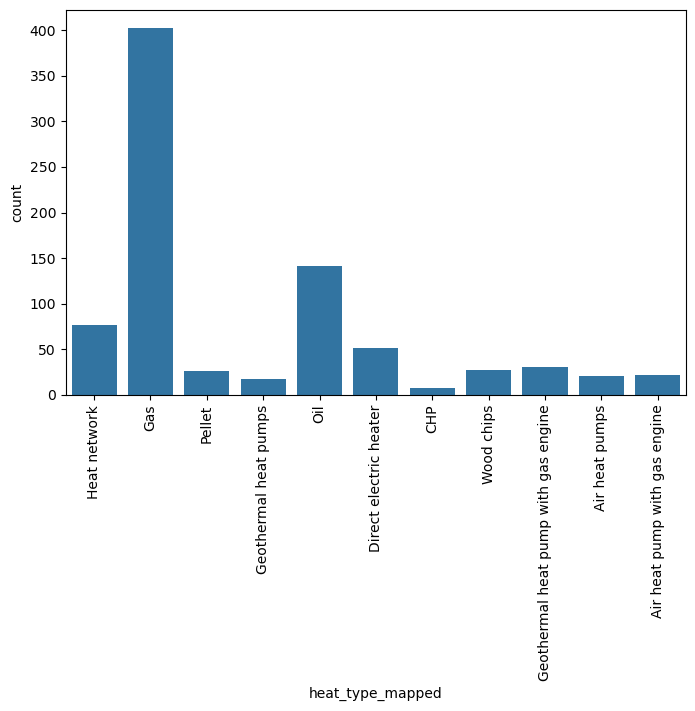

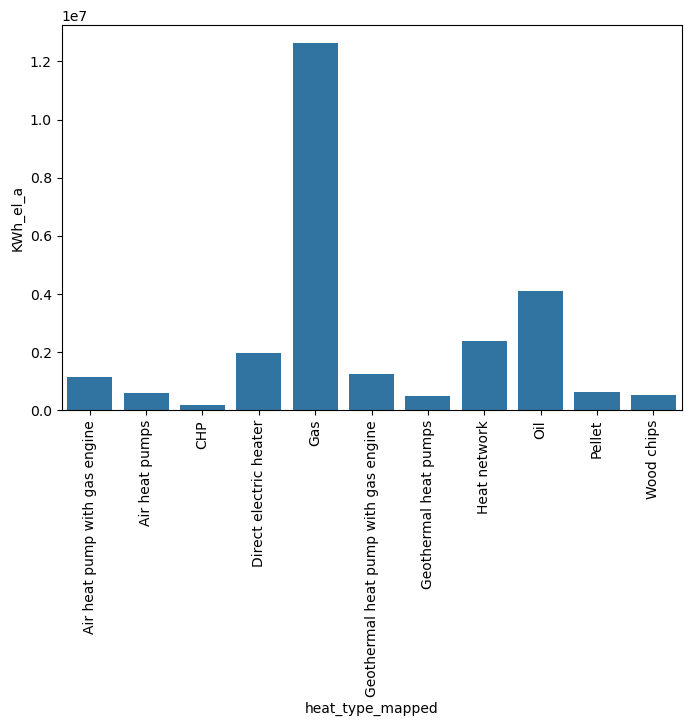

In [236]:
zero_th_apt.heat_type.value_counts()
plt.figure(figsize=(8,5))
chart = sns.countplot(data=zero_th_apt,x='heat_type_mapped')
chart.tick_params(axis='x', rotation=90)
plt.figure(figsize=(8,5))
chart = sns.barplot(data =zero_th_apt[['heat_type_mapped','KWh_el_a']].groupby('heat_type_mapped')['KWh_el_a'].sum().reset_index(),x='heat_type_mapped',y='KWh_el_a')
chart.tick_params(axis='x', rotation=90)

<Axes: xlabel='Num_HH', ylabel='KWh_th_a'>

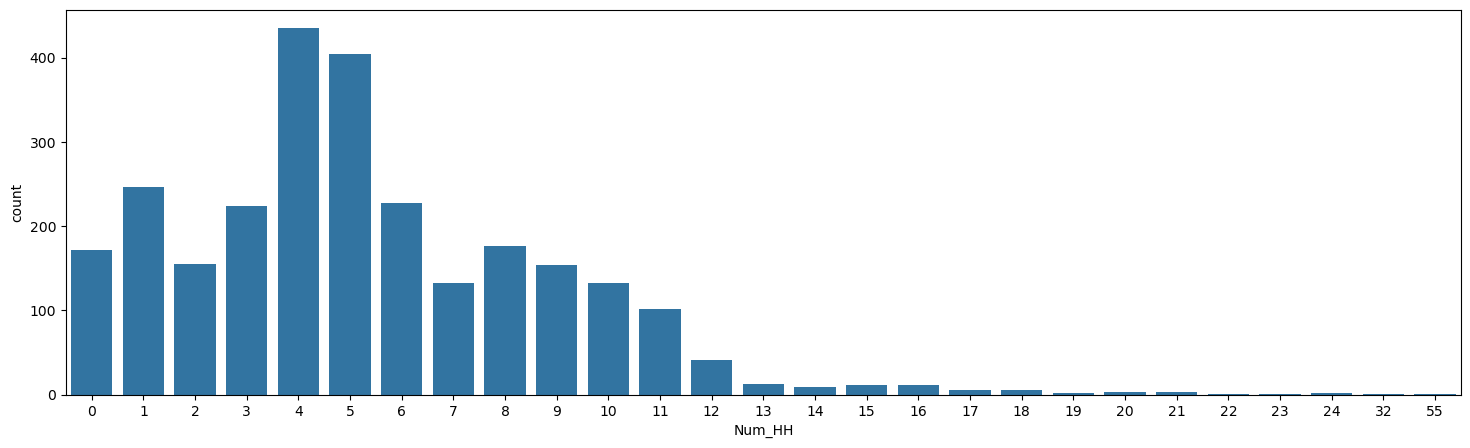

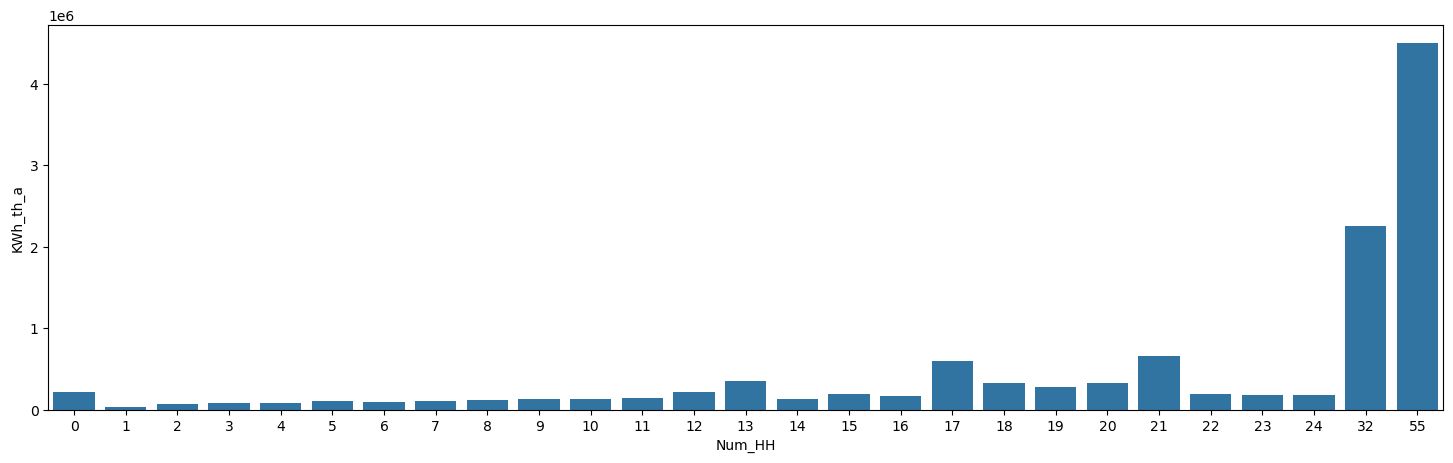

In [237]:
#display(non_zero_th_apt.Num_HH.value_counts())
plt.figure(figsize=(18,5))
sns.countplot(data=non_zero_th_apt,x='Num_HH')
plt.figure(figsize=(18,5))
sns.barplot(data =non_zero_th_apt[['Num_HH','KWh_th_a']].groupby('Num_HH')['KWh_th_a'].mean().reset_index(),x='Num_HH',y='KWh_th_a')

[Text(0.5, 0, 'Total Heated Space'),
 Text(0, 0.5, 'Annual Heat Demand (in KWh)'),
 Text(0.5, 1.0, '')]

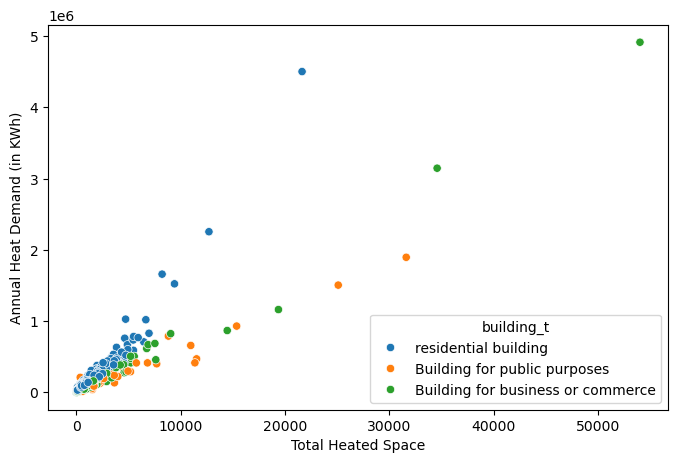

In [238]:
plt.figure(figsize=(8,5))
chart = sns.scatterplot(data=non_zero_th_apt,x='full_space',y='KWh_th_a',hue="building_t")
# JointGrid has a convenience function
#chart.set_axis_labels('Total Heated Space', 'Annual Heat Demand (in KWh)', fontsize=10)

chart.set(xlabel='Total Heated Space', ylabel='Annual Heat Demand (in KWh)',title='')

<Axes: xlabel='Num_HH', ylabel='KWh_th_a'>

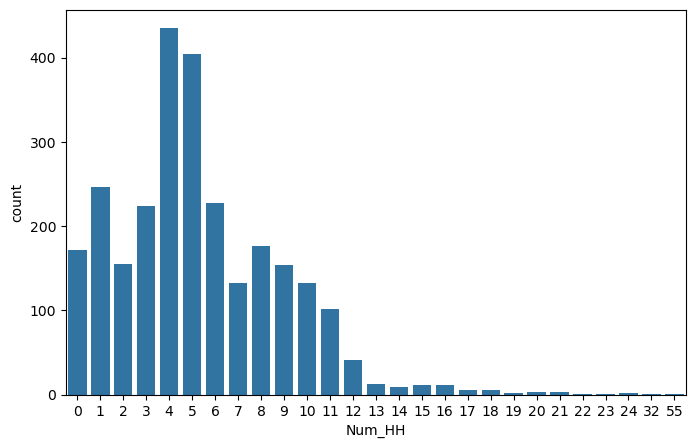

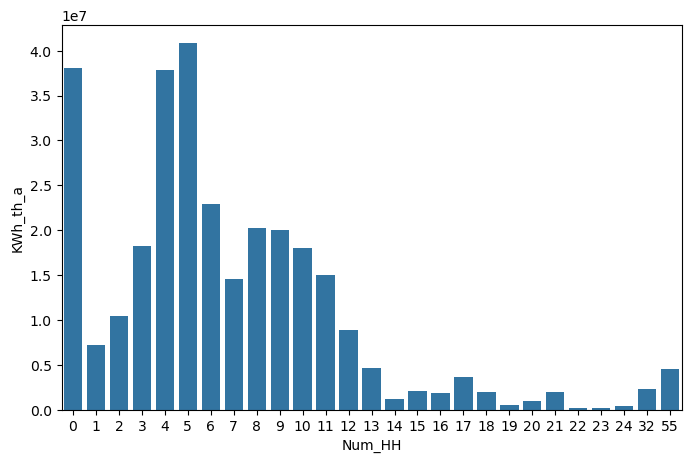

In [239]:
non_zero_th_apt.heat_type.value_counts()
plt.figure(figsize=(8,5))
sns.countplot(data=non_zero_th_apt,x='Num_HH')
plt.figure(figsize=(8,5))
sns.barplot(data =non_zero_th_apt[['Num_HH','KWh_th_a']].groupby('Num_HH')['KWh_th_a'].sum().reset_index(),x='Num_HH',y='KWh_th_a' )

<Axes: xlabel='heat_type', ylabel='KWh_th_a'>

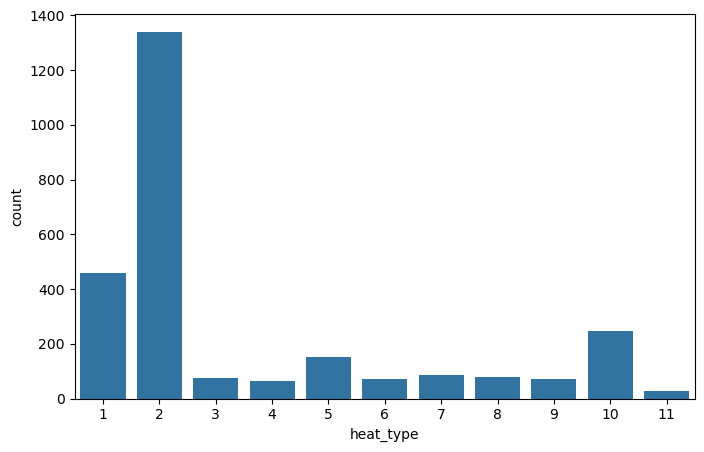

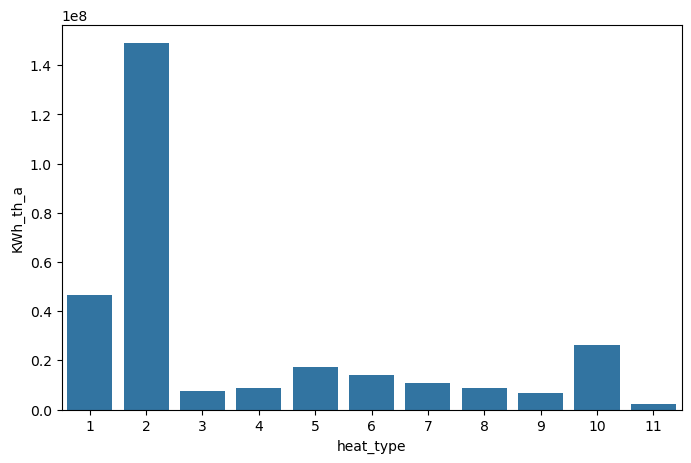

In [242]:
non_zero_th_apt.heat_type.value_counts()
plt.figure(figsize=(8,5))
sns.countplot(data=non_zero_th_apt,x='heat_type')
plt.figure(figsize=(8,5))
sns.barplot(data =non_zero_th_apt[['heat_type','KWh_th_a']].groupby('heat_type')['KWh_th_a'].sum().reset_index(),x='heat_type',y='KWh_th_a' )

<Axes: xlabel='heat_type', ylabel='count'>

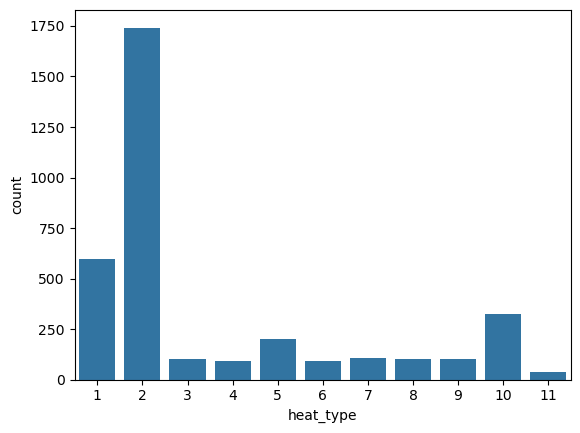

In [243]:
rdf.heat_type.value_counts()
sns.countplot(data=rdf,x='heat_type')

<Axes: xlabel='heat_type', ylabel='KWh_th_a'>

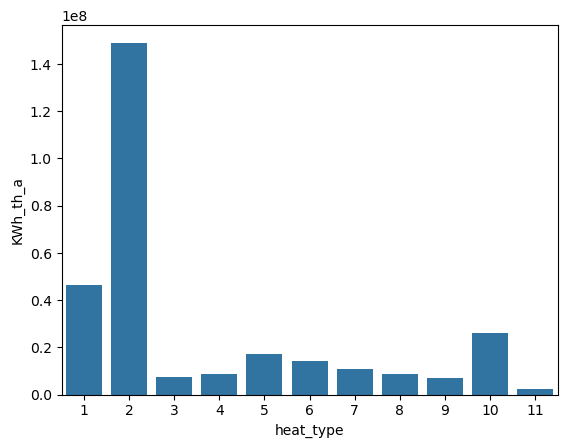

In [244]:
#rdf[['heat_type','KWh_th_a']].groupby('heat_type')['KWh_th_a'].sum().reset_index()
sns.barplot(data =rdf[['heat_type','KWh_th_a']].groupby('heat_type')['KWh_th_a'].sum().reset_index(),x='heat_type',y='KWh_th_a' )

<Axes: xlabel='heated_liv', ylabel='KWh_th_a'>

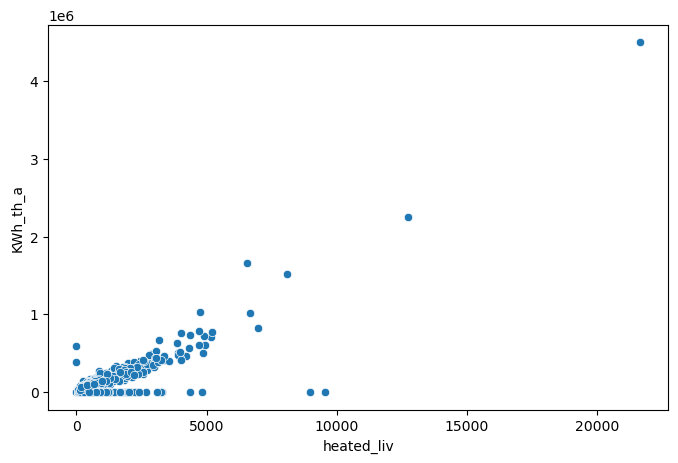

In [249]:
plt.figure(figsize=(8,5))
#sns.scatterplot(data=residential_apt_df[residential_apt_df.volume <= 30000],x='volume',y='KWh_th_a')
sns.scatterplot(data=residential_apt_df,x='heated_liv',y='KWh_th_a')

<Axes: xlabel='full_space', ylabel='KWh_th_a'>

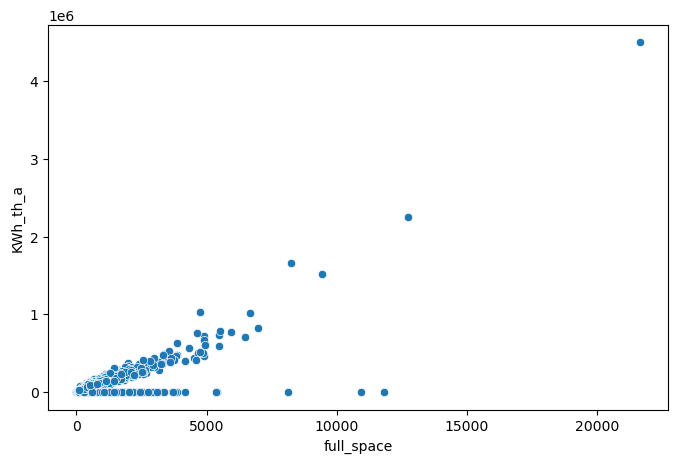

In [250]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=residential_apt_df,x='full_space',y='KWh_th_a')

(3497, 39)

<Axes: xlabel='building_t', ylabel='KWh_el_a'>

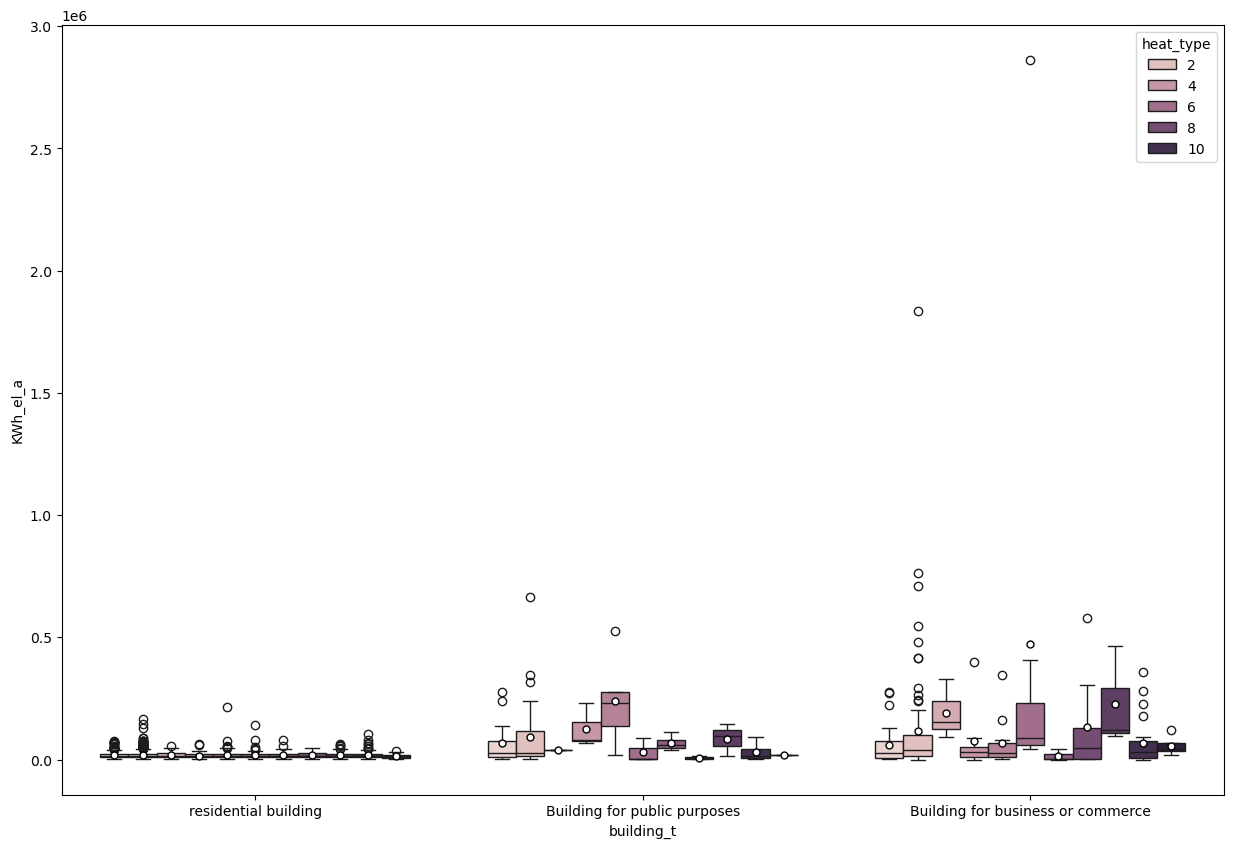

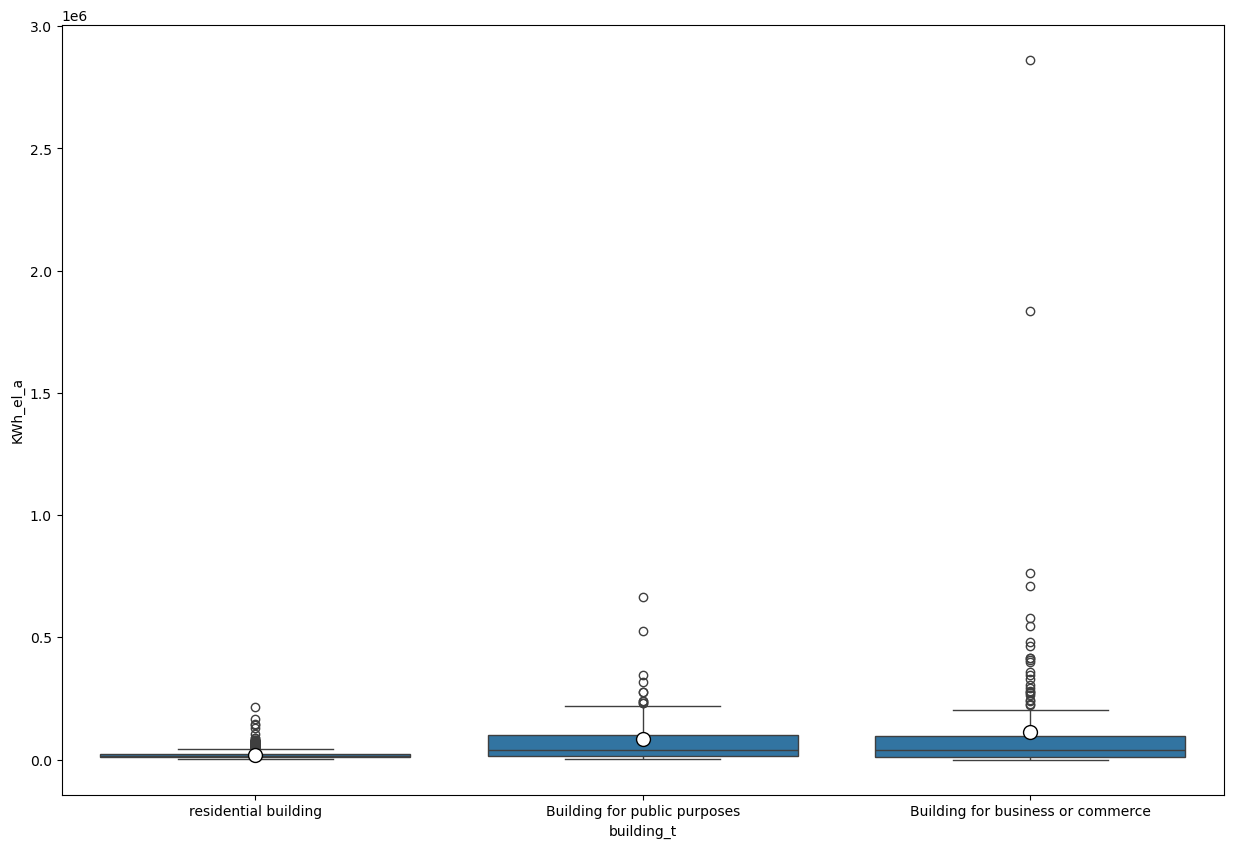

In [252]:
#test_df = rdf[~(rdf.KWh_th_a == 0)].copy()
#test_df = test_df[~(test_df.KWh_th_a >= 200000)]
display(rdf.shape)
plt.figure(figsize=(15,10))
sns.boxplot(data = rdf ,
            x = 'building_t',
            y = 'KWh_el_a',
            hue = 'heat_type',
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"}
           )

plt.figure(figsize=(15,10))
# Check the number of outliers with increasing number of rows
sns.boxplot(x="building_t", y="KWh_el_a", data=rdf,
            showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})           

<Axes: xlabel='roof_type', ylabel='KWh_el_a'>

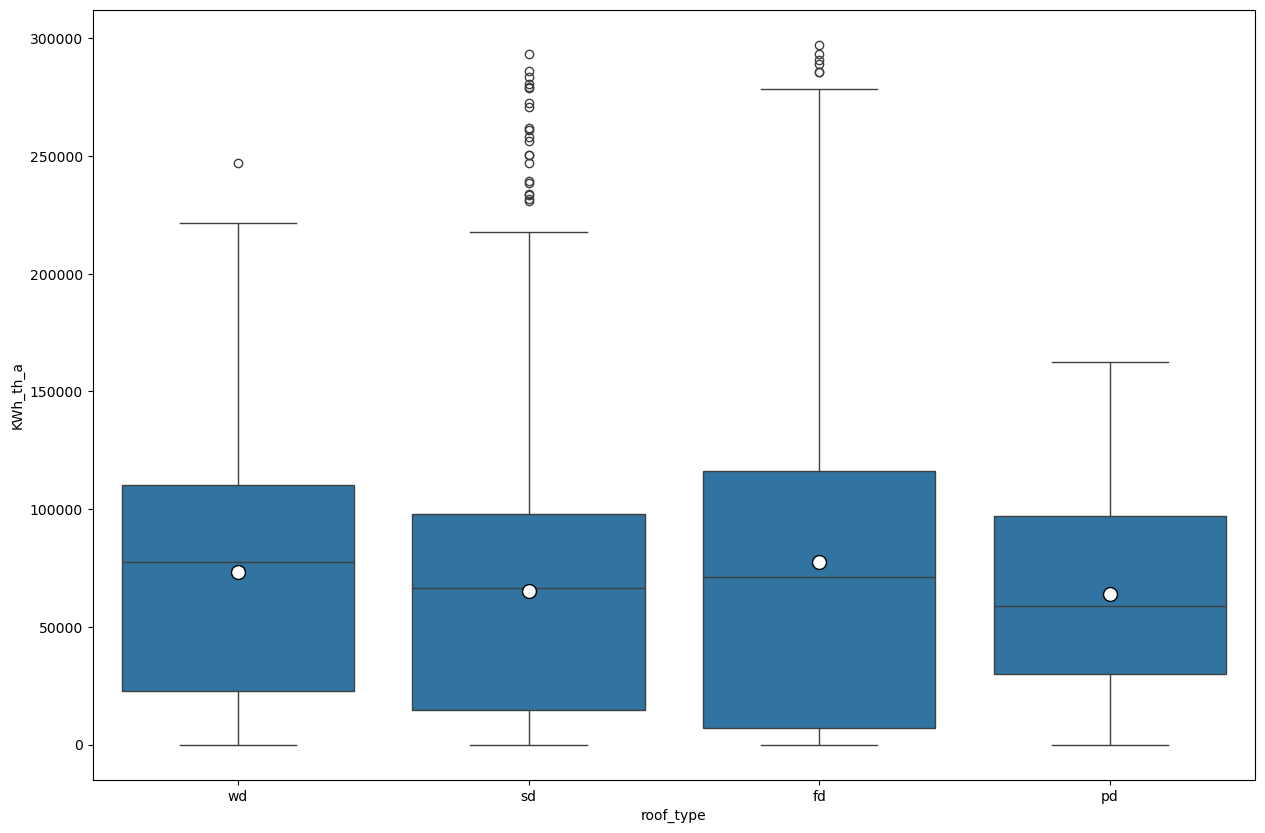

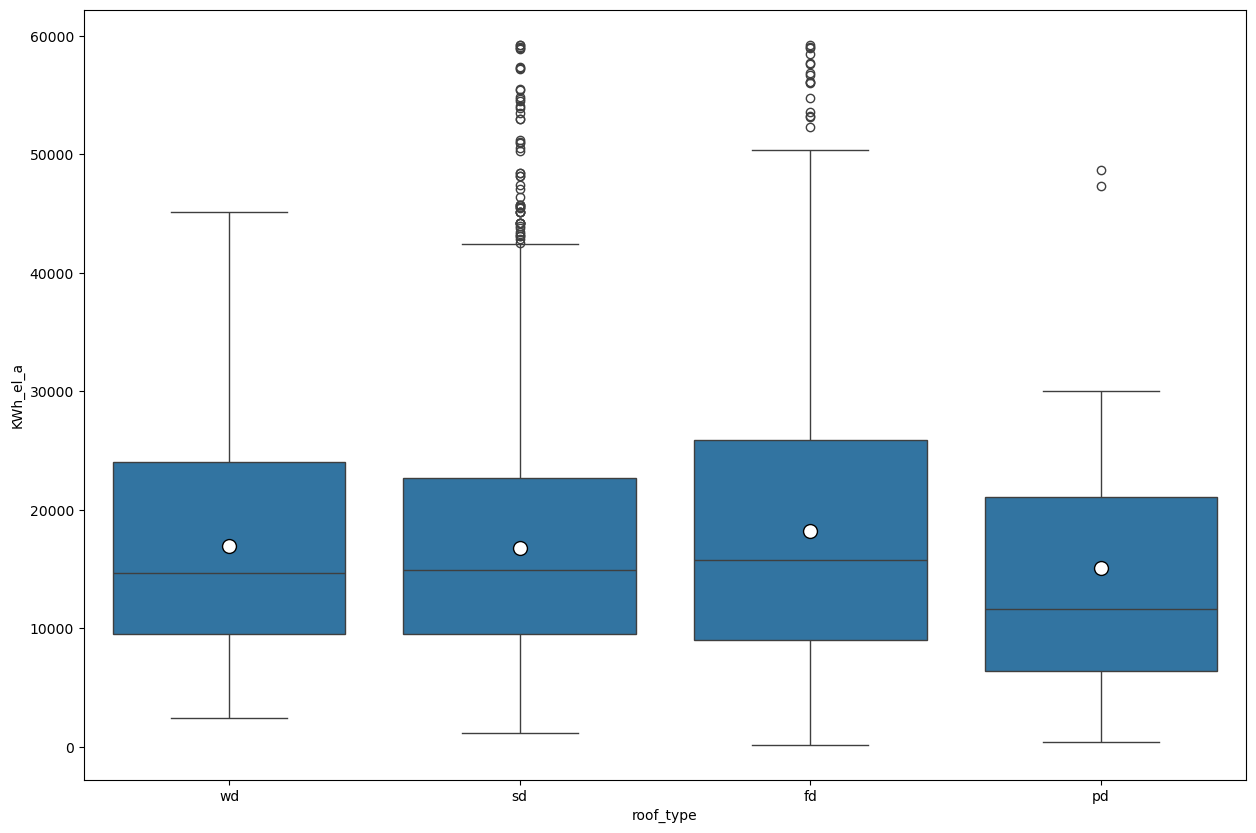

In [253]:
plt.figure(figsize=(15,10))
# Check the number of outliers with increasing number of rows
sns.boxplot(x="roof_type", y="KWh_th_a", data=rdf[~(rdf.KWh_th_a >= 300000)],
            showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})        

plt.figure(figsize=(15,10))
# Check the number of outliers with increasing number of rows
sns.boxplot(x="roof_type", y="KWh_el_a", data=rdf[~(rdf.KWh_el_a >= 60000)],
            showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})                              

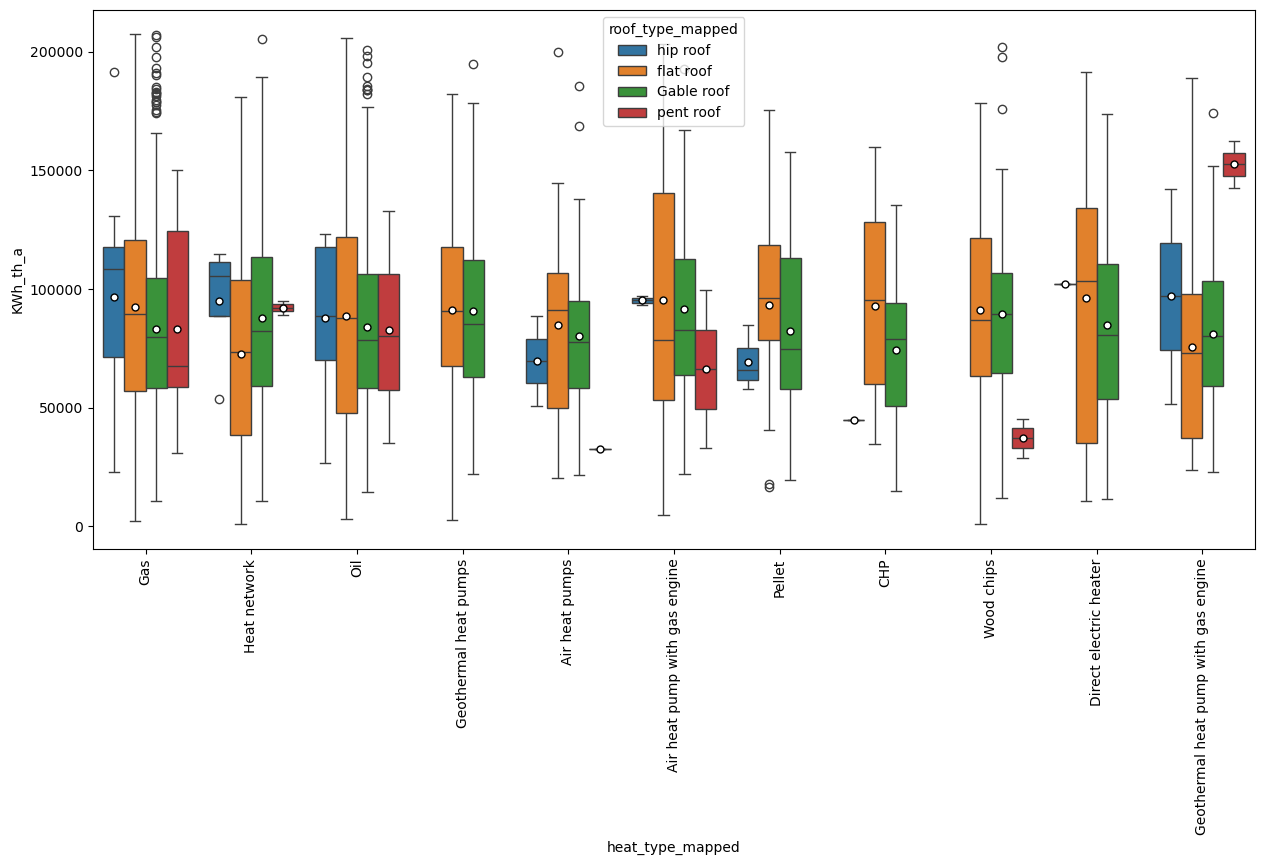

In [254]:
Q1 = non_zero_th_apt['KWh_th_a'].quantile(0.25)
Q3 = non_zero_th_apt['KWh_th_a'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt['KWh_th_a'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt['KWh_th_a'] <= Q3 + 1.5 *IQR)
 

plt.figure(figsize=(15,7))
chart = sns.boxplot(data = non_zero_th_apt.loc[filter],
            x = 'heat_type_mapped',
            y = 'KWh_th_a',
            hue = 'roof_type_mapped',
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"}
           )              
chart.tick_params(axis='x', rotation=90)             


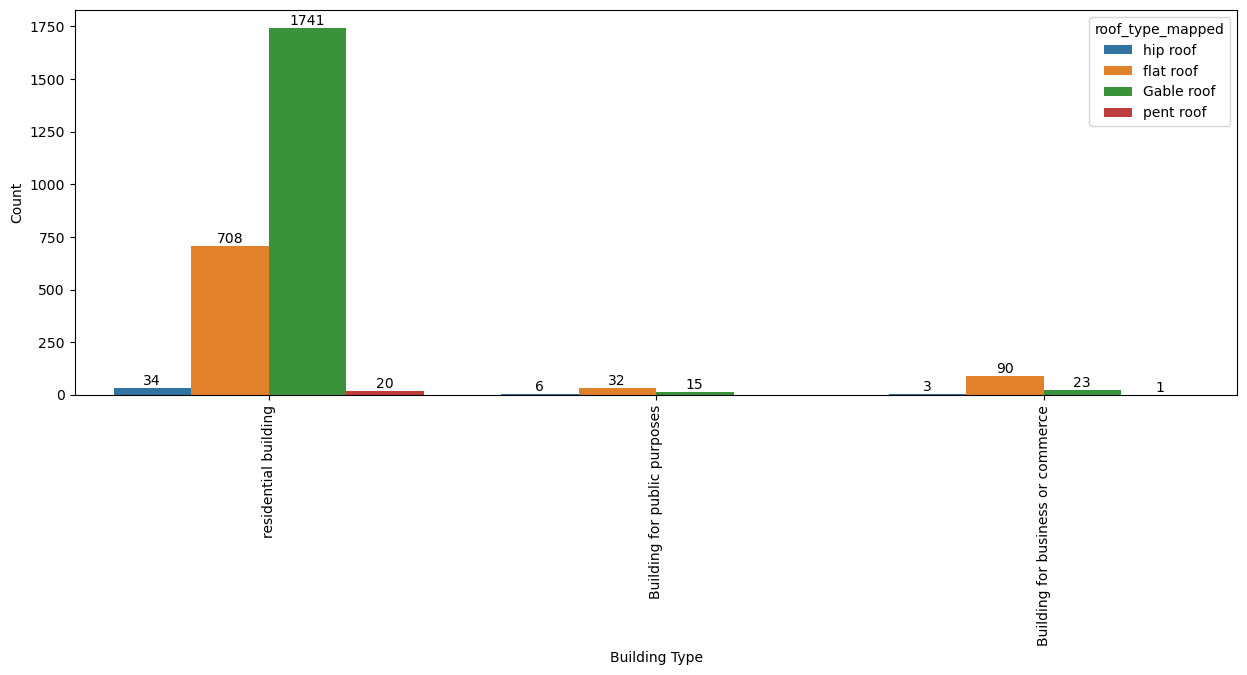

[Text(0.5, 0, 'Heat Type'), Text(0, 0.5, 'Annual Heat Demand (in KWh)')]

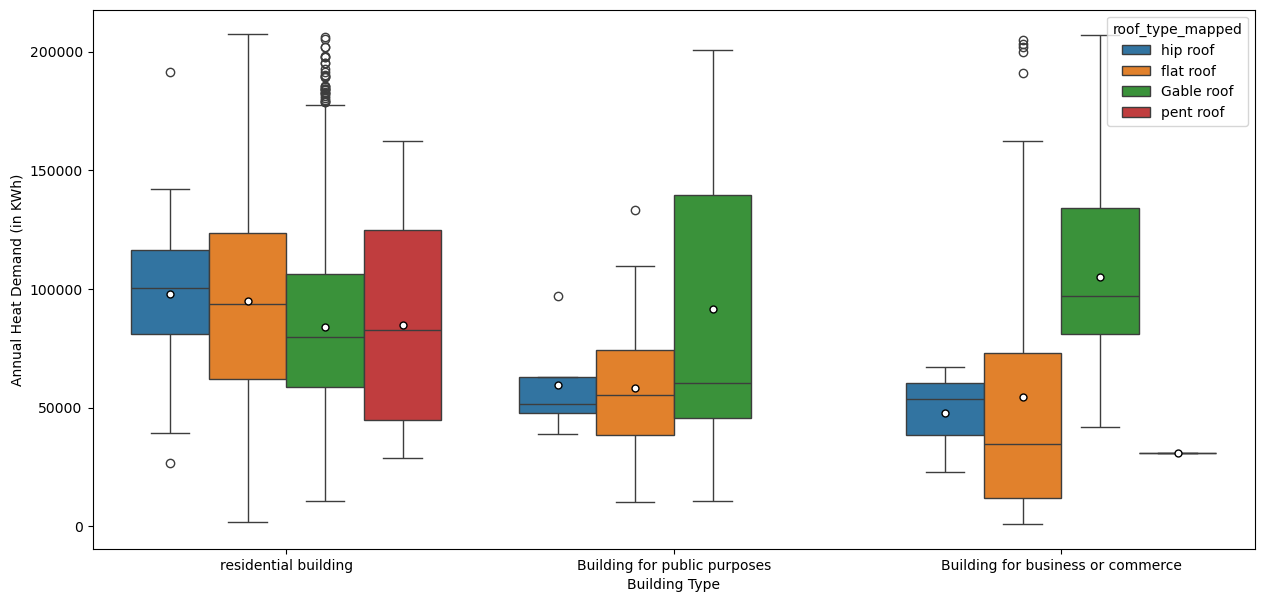

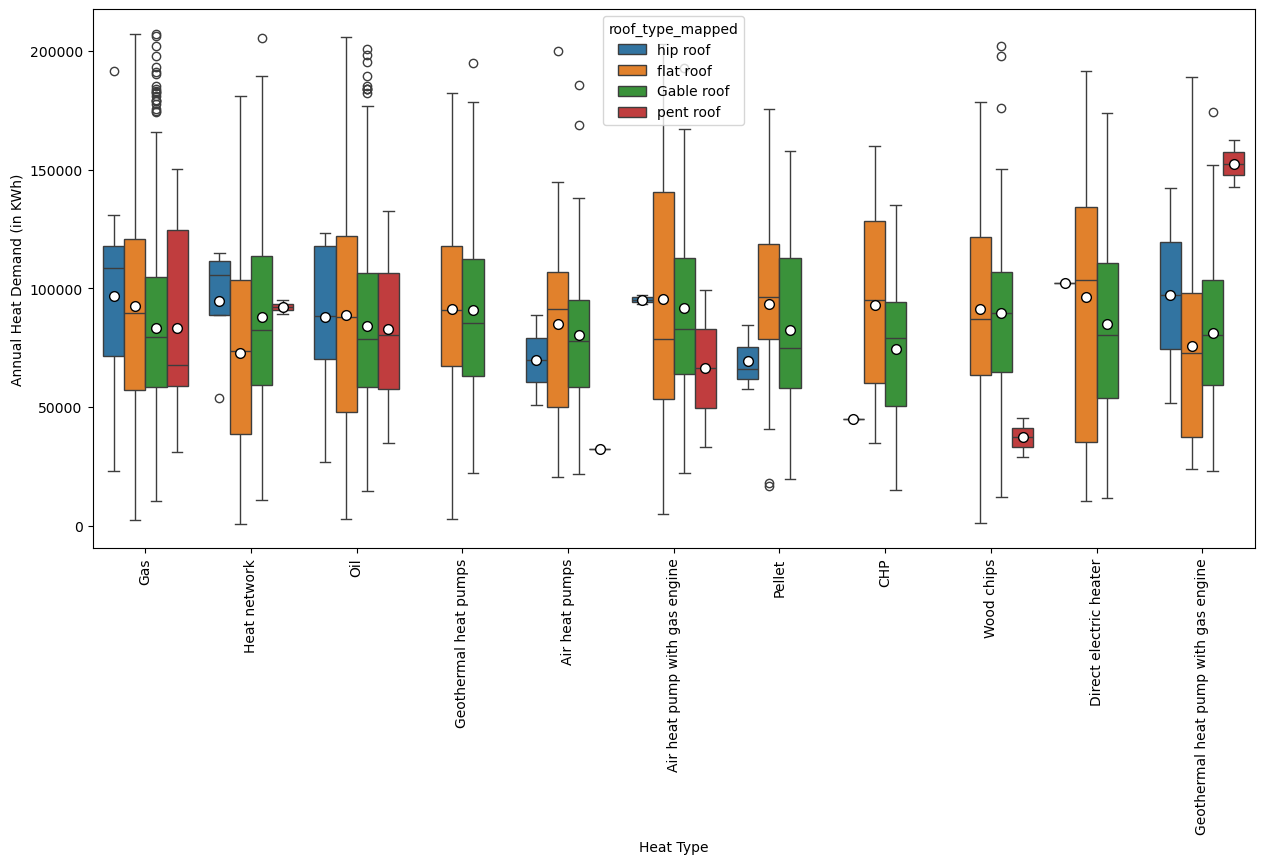

In [255]:
plt.figure(figsize=(15,5))
chart = sns.countplot(data=non_zero_th_apt,x='building_t',hue='roof_type_mapped')
for label in chart.containers:
    chart.bar_label(label)
chart.tick_params(axis='x', rotation=90)  
chart.set(xlabel='Building Type', ylabel='Count')
plt.show()

Q1 = non_zero_th_apt['KWh_th_a'].quantile(0.25)
Q3 = non_zero_th_apt['KWh_th_a'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt['KWh_th_a'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt['KWh_th_a'] <= Q3 + 1.5 *IQR)
 

plt.figure(figsize=(15,7))
chart = sns.boxplot(data = non_zero_th_apt.loc[filter],
            x = 'building_t',
            y = 'KWh_th_a',
            hue = 'roof_type_mapped',
            showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"5"}
           )              

chart.set(xlabel='Building Type', ylabel='Annual Heat Demand (in KWh)')       

plt.figure(figsize=(15,7))
# Check the number of outliers with increasing number of rows
chart = sns.boxplot(x="heat_type_mapped", y="KWh_th_a", data = non_zero_th_apt.loc[filter],
            showmeans=True,
            hue = 'roof_type_mapped',
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})        
chart.tick_params(axis='x', rotation=90)                      
chart.set(xlabel='Heat Type', ylabel='Annual Heat Demand (in KWh)')

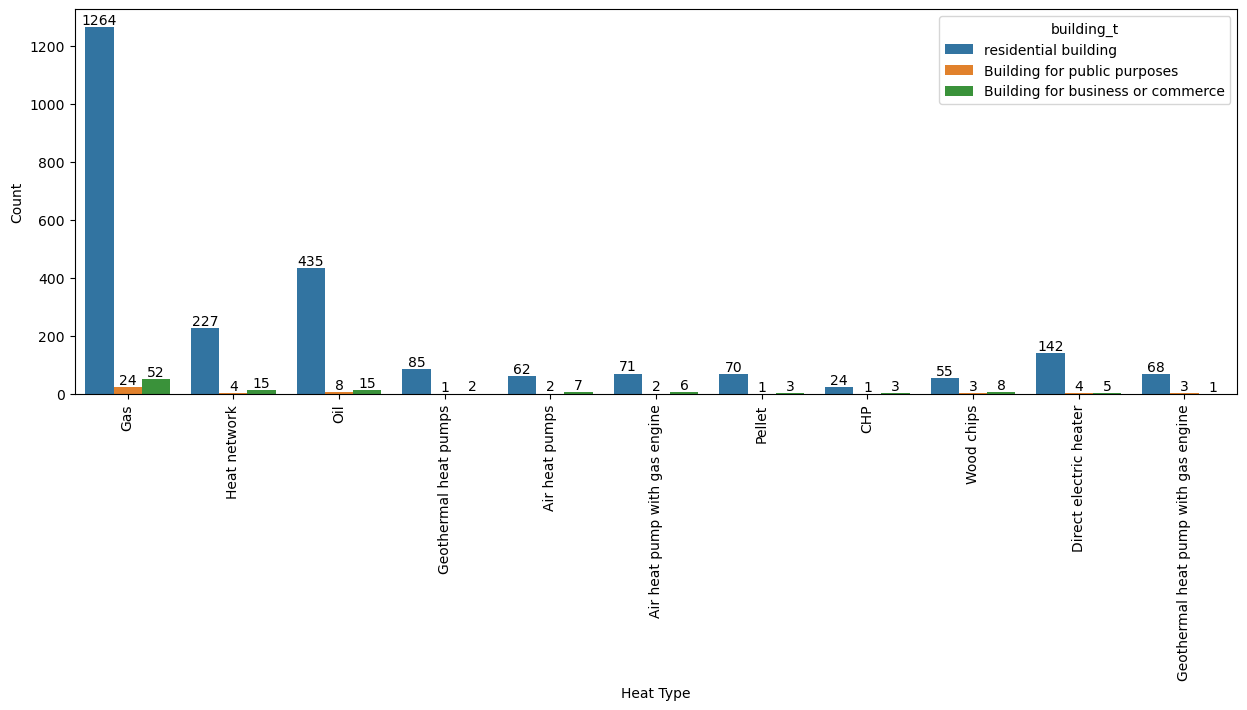

[Text(0.5, 0, 'Heat Type'), Text(0, 0.5, 'Annual Heat Demand (in KWh)')]

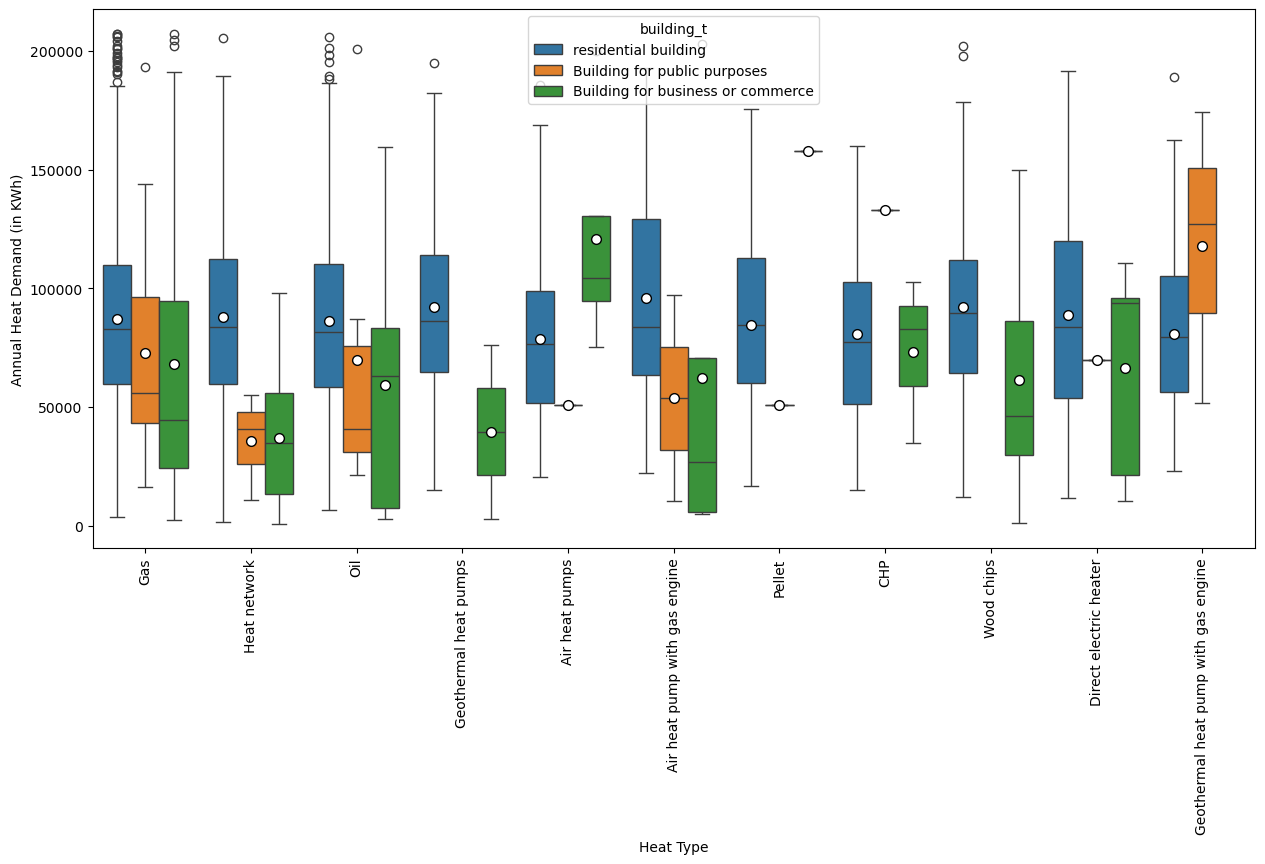

In [256]:
plt.figure(figsize=(15,5))
chart = sns.countplot(data=non_zero_th_apt,x='heat_type_mapped',hue='building_t')
for label in chart.containers:
    chart.bar_label(label)
chart.tick_params(axis='x', rotation=90)  
chart.set(xlabel='Heat Type', ylabel='Count')
plt.show()

Q1 = non_zero_th_apt['KWh_th_a'].quantile(0.25)
Q3 = non_zero_th_apt['KWh_th_a'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt['KWh_th_a'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt['KWh_th_a'] <= Q3 + 1.5 *IQR)
 


plt.figure(figsize=(15,7))
# Check the number of outliers with increasing number of rows
chart = sns.boxplot(x="heat_type_mapped", y="KWh_th_a", data = non_zero_th_apt.loc[filter],
            showmeans=True,
            hue = 'building_t',
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})        
chart.tick_params(axis='x', rotation=90)                      
chart.set(xlabel='Heat Type', ylabel='Annual Heat Demand (in KWh)')

In [41]:
rdf.columns

Index(['adress', 'full_space', 'heat_type', 'origin_id', 'KWh_el_a',
       'KWh_th_a', 'address_nr', 'address_su', 'address_st', 'building_t',
       'building_f', 'building_1', 'final_user', 'storeys', 'room_heigh',
       'height', 'roof_heigh', 'groundsurf', 'heated_liv', 'cts_area',
       'ind_area', 'roof_type', 'roof_direc', 'roof_pitch', 'city', 'plz',
       'ags', 'neighbors', 'AGS_1', 'ARS', 'Age', 'Num_HH', 'yor_facade',
       'yor_upperf', 'window_age', 'geometry', 'heat_type_mapped',
       'roof_type_mapped'],
      dtype='object')

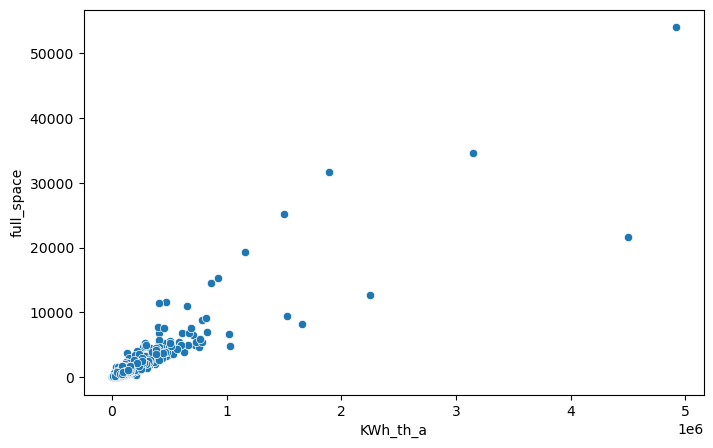

In [39]:
plt.figure(figsize=(8,5))
chart = sns.scatterplot(data=non_zero_th_apt,y='full_space',x='KWh_th_a')
#chart.tick_params(axis='x', rotation=90)
#we can remove the ZERO th values and see the good correlation

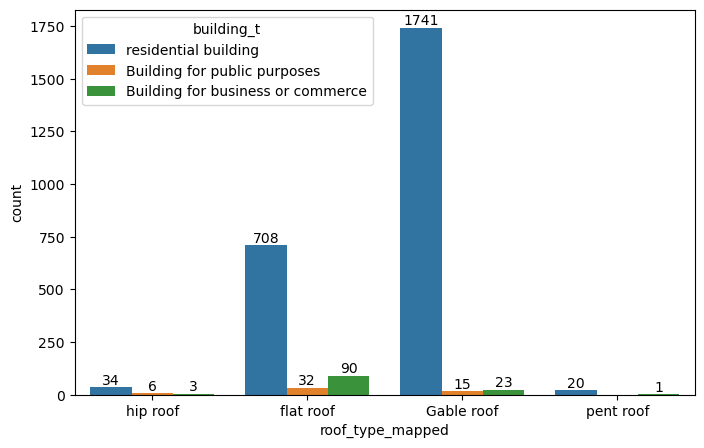

In [623]:
plt.figure(figsize=(8,5))
chart = sns.countplot(data=non_zero_th_apt,x='roof_type_mapped',hue='building_t')
for label in chart.containers:
    chart.bar_label(label)
plt.show()


In [620]:
Q1 = non_zero_th_apt['KWh_th_a'].quantile(0.25)
Q3 = non_zero_th_apt['KWh_th_a'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt['KWh_th_a'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt['KWh_th_a'] <= Q3 + 1.5 *IQR)

roof_data = non_zero_th_apt.loc[filter][['roof_type_mapped','KWh_th_a']].groupby(['roof_type_mapped']).mean().reset_index()
roof_data['Monthly Heat Demand (in KWh)'] = roof_data['KWh_th_a']/12
roof_data.rename(columns={'roof_type_mapped':'Roof Type','KWh_th_a':'Annual Heat Demand (in KWh)'},inplace=True)
roof_data

Roof Type  Annual Heat Demand (in KWh)  Monthly Heat Demand (in KWh)
0  Gable roof                 84255.886153                   7021.323846
1   flat roof                 89971.982848                   7497.665237
2    hip roof                 89767.681989                   7480.640166
3   pent roof                 82097.998513                   6841.499876

<Axes: xlabel='Monthly Heat Demand (in KWh)', ylabel='Roof Type'>

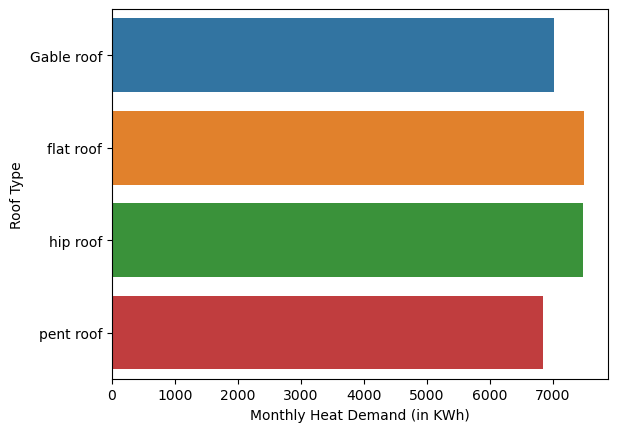

In [621]:
sns.barplot(data=roof_data, x="Monthly Heat Demand (in KWh)", y="Roof Type", hue="Roof Type", legend=False)


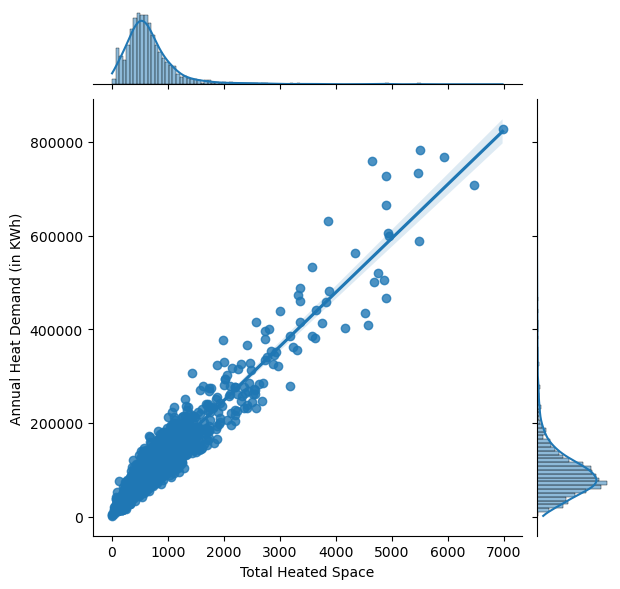

In [167]:
# Space vs heat demand
chart = sns.jointplot(x="full_space", y="KWh_th_a", data=non_zero_th_residential_apt, kind="reg"); 

# JointGrid has a convenience function
chart.set_axis_labels('Total Heated Space', 'Annual Heat Demand (in KWh)', fontsize=10)

#chart.set(xlabel='Total Heated Space', ylabel='Annual Heat Demand (in KWh)',title='Regression Plot')
# Your answer goes here
#sns.jointplot(x="full_space", y="KWh_el_a", data=non_zero_th_residential_apt, kind="kde"); 

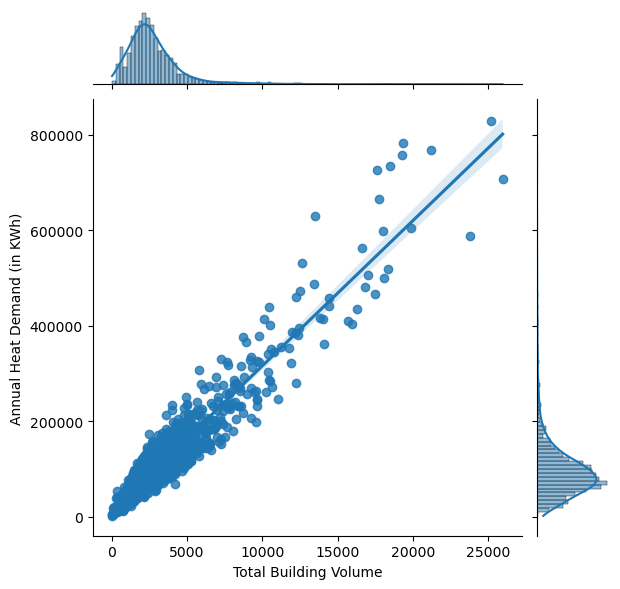

In [171]:
# Volume vs heat demand
chart = sns.jointplot(x="building_volume", y="KWh_th_a", data=non_zero_th_residential_apt, kind="reg"); 
chart.set_axis_labels('Total Building Volume', 'Annual Heat Demand (in KWh)', fontsize=10)
# Your answer goes here
#sns.jointplot(x="building_volume", y="KWh_th_a", data=non_zero_th_residential_apt, kind="kde"); 

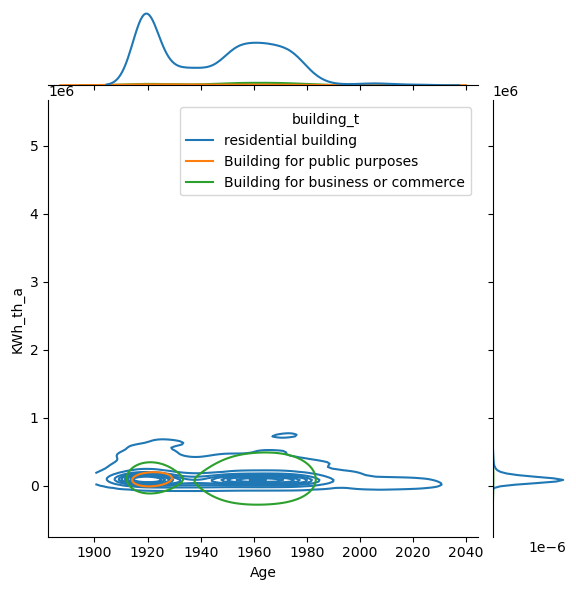

In [174]:
sns.jointplot(x="Age", y="KWh_th_a", data=non_zero_th_apt, kind="kde",hue='building_t'); 

[Text(0.5, 0, 'Construction Year of all dwellings'),
 Text(0, 0.5, 'Annual Heat Demand (in KWh)'),
 Text(0.5, 1.0, 'Average Annual Heat demand for dwellings')]

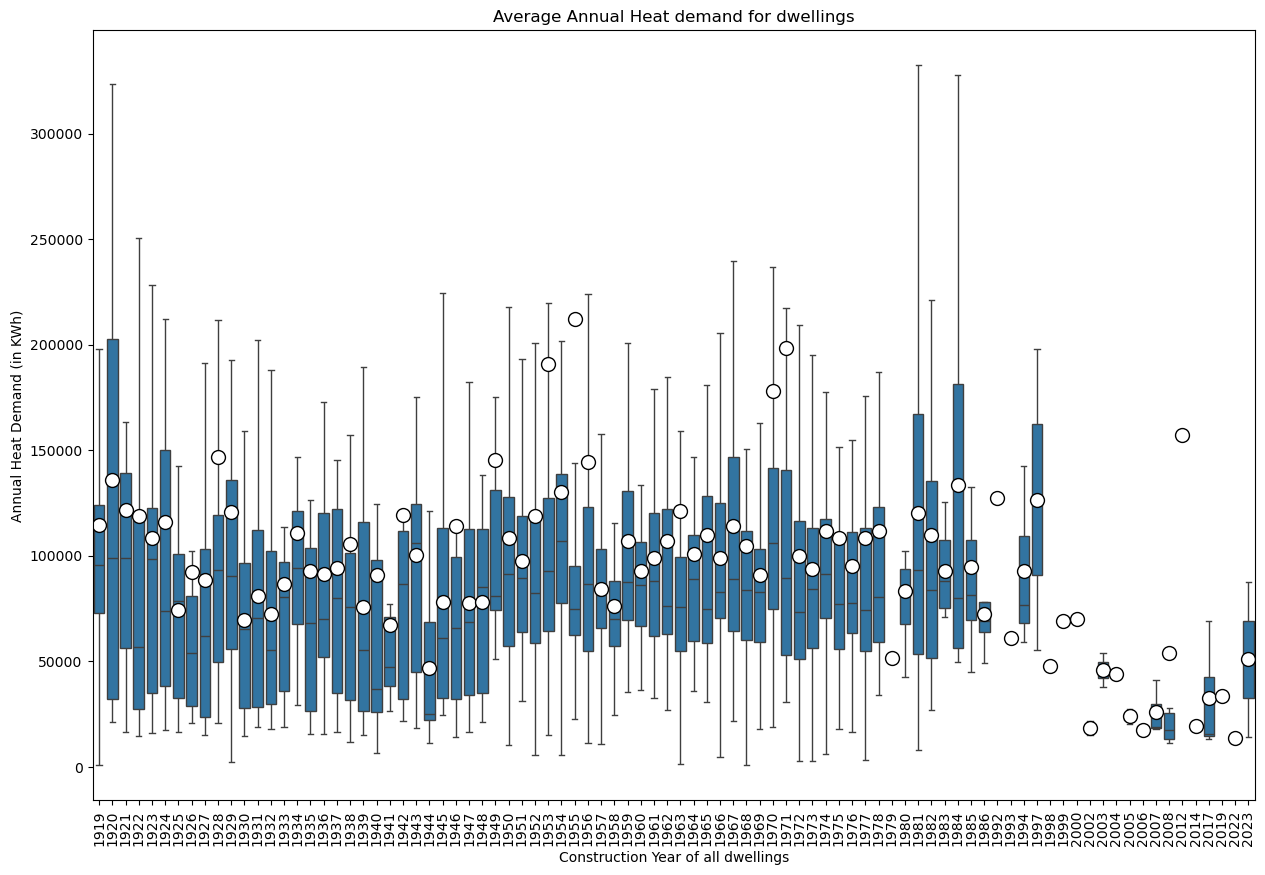

In [182]:
plt.figure(figsize=(15,10))
chart = sns.boxplot(data = non_zero_th_apt ,
            x = 'Age',
            y = 'KWh_th_a',
            #hue = 'cancellation policy',
            showmeans=True,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)           
chart.set(xlabel='Construction Year of all dwellings', ylabel='Annual Heat Demand (in KWh)',title='Average Annual Heat demand for dwellings')

[Text(0.5, 0, 'Construction Year'),
 Text(0, 0.5, 'Annual Heat Demand (in KWh)'),
 Text(0.5, 1.0, 'Effect on heat demand by construction year')]

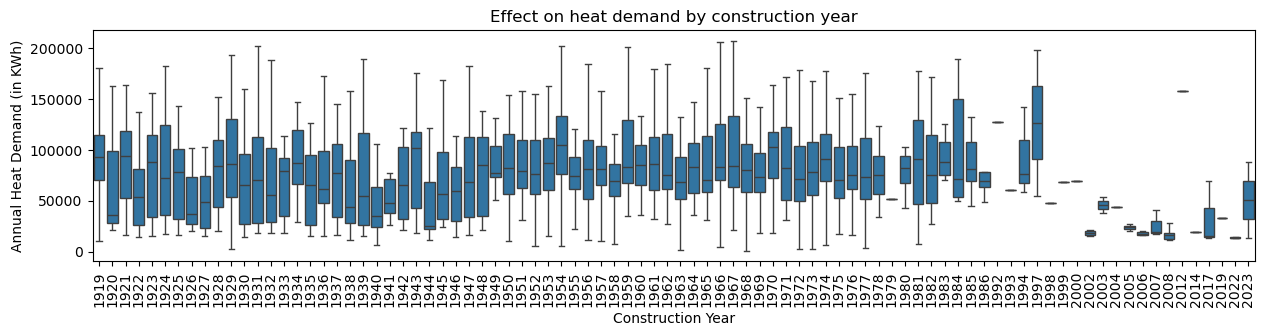

In [185]:
Q1 = non_zero_th_apt['KWh_th_a'].quantile(0.25)
Q3 = non_zero_th_apt['KWh_th_a'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt['KWh_th_a'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt['KWh_th_a'] <= Q3 + 1.5 *IQR)
 

plt.figure(figsize=(15,3))
chart = sns.boxplot(data = non_zero_th_apt.loc[filter],
            x = 'Age',
            y = 'KWh_th_a',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Construction Year', ylabel='Annual Heat Demand (in KWh)',title='Effect on heat demand by construction year') 

#shows drop in annual heat requirement for new constructions vs old age buildings
#shows new constructions are more efficient in maintaing the heat  and keeping the heat demand low 

[Text(0.5, 0, 'Construction Year'),
 Text(0, 0.5, 'Annual Heat Demand (in KWh)'),
 Text(0.5, 1.0, 'Effect on heat demand by construction year(with mean values)')]

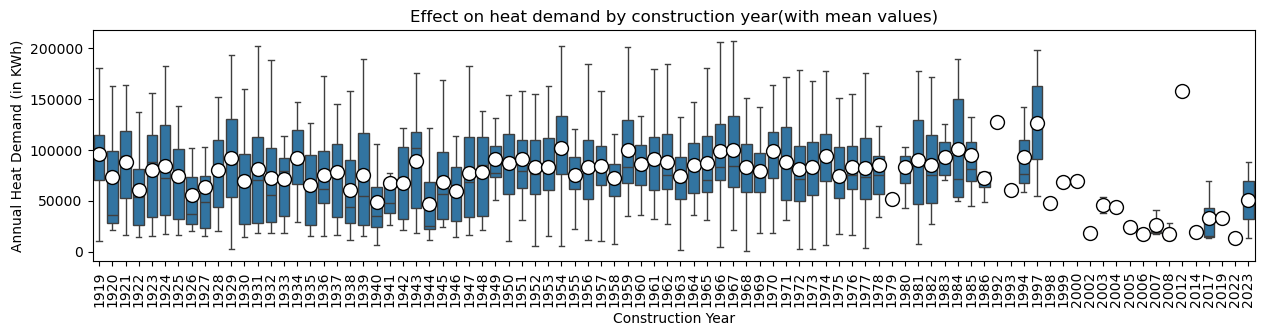

In [186]:
Q1 = non_zero_th_apt['KWh_th_a'].quantile(0.25)
Q3 = non_zero_th_apt['KWh_th_a'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt['KWh_th_a'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt['KWh_th_a'] <= Q3 + 1.5 *IQR)
 

plt.figure(figsize=(15,3))
chart = sns.boxplot(data = non_zero_th_apt.loc[filter],
            x = 'Age',
            y = 'KWh_th_a',
            #hue = 'cancellation policy',
            showmeans=True,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)    
chart.set(xlabel='Construction Year', ylabel='Annual Heat Demand (in KWh)',title='Effect on heat demand by construction year(with mean values)') 
#shows drop in annual heat requirement for new constructions vs old age buildings
#shows new constructions are more efficient in maintaing the heat  and keeping the heat demand low 

/Users/ravi/opt/anaconda3/envs/lab/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


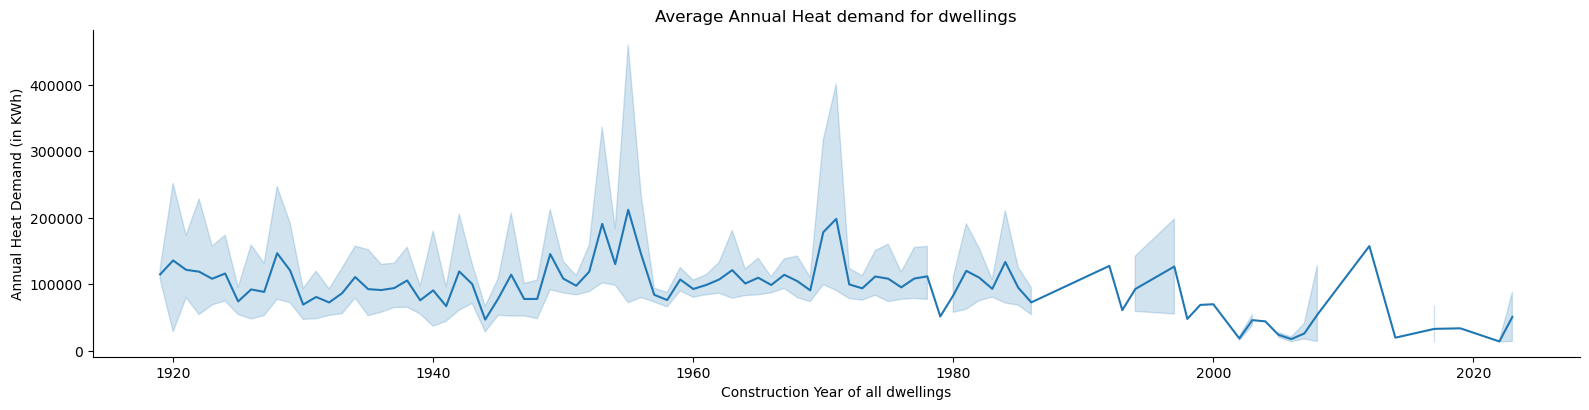

In [205]:
#plt.figure(figsize=(15,3))
chart = sns.relplot(data=non_zero_th_apt, x="Age", y="KWh_th_a", kind="line",height=4, aspect=4)
chart.set(xlabel='Construction Year of all dwellings', ylabel='Annual Heat Demand (in KWh)',title='Average Annual Heat demand for dwellings')


In [217]:
non_zero_th_apt_2000s = non_zero_th_apt[non_zero_th_apt['Age'] >= 2000]
non_zero_th_apt_lt_2000s = non_zero_th_apt[~(non_zero_th_apt['Age'] >= 2000)]
non_zero_th_apt_2000s.shape,non_zero_th_apt_lt_2000s.shape

((34, 39), (2639, 39))

[Text(0.5, 0, 'Construction Year'),
 Text(0, 0.5, 'Annual Heat Demand (in KWh)'),
 Text(0.5, 1.0, 'Effect on heat demand by construction year')]

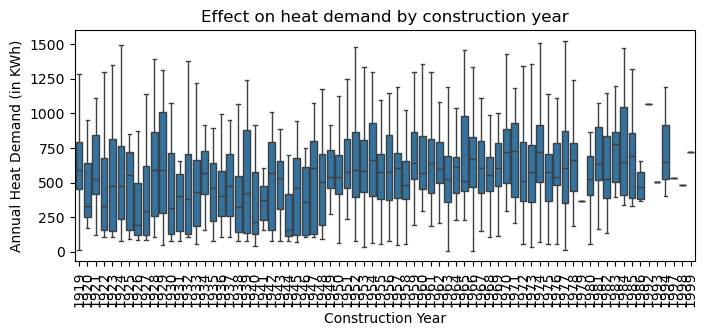

In [218]:
Q1 = non_zero_th_apt_lt_2000s['full_space'].quantile(0.25)
Q3 = non_zero_th_apt_lt_2000s['full_space'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt_lt_2000s['full_space'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt_lt_2000s['full_space'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(8,3))
chart = sns.boxplot(
            data = non_zero_th_apt_lt_2000s.loc[filter],
            #data = non_zero_th_apt_2000s,
            x = 'Age',
            y = 'full_space',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Construction Year', ylabel='Annual Heat Demand (in KWh)',title='Effect on heat demand by construction year') 


[Text(0.5, 0, 'Construction Year'),
 Text(0, 0.5, 'Total Heated Space'),
 Text(0.5, 1.0, 'Effect on heat demand by construction year')]

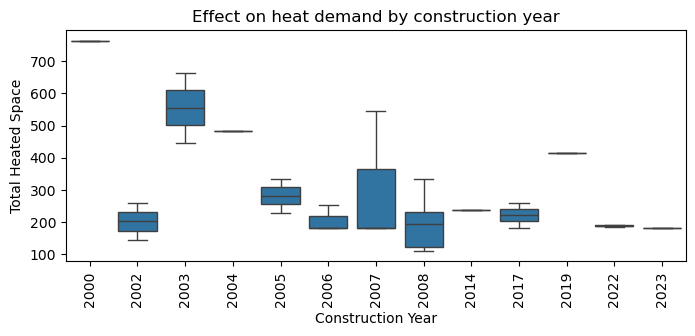

In [235]:
Q1 = non_zero_th_apt_2000s['full_space'].quantile(0.25)
Q3 = non_zero_th_apt_2000s['full_space'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt_2000s['full_space'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt_2000s['full_space'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(8,3))
chart = sns.boxplot(
            data = non_zero_th_apt_2000s.loc[filter],
            #data = non_zero_th_apt_2000s,
            x = 'Age',
            y = 'full_space',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Construction Year', ylabel='Total Heated Space',title='Effect on heat demand by construction year') 


[Text(0.5, 0, 'Construction Year'),
 Text(0, 0.5, 'Annual Heat Demand (in KWh)'),
 Text(0.5, 1.0, 'Effect on heat demand by construction year')]

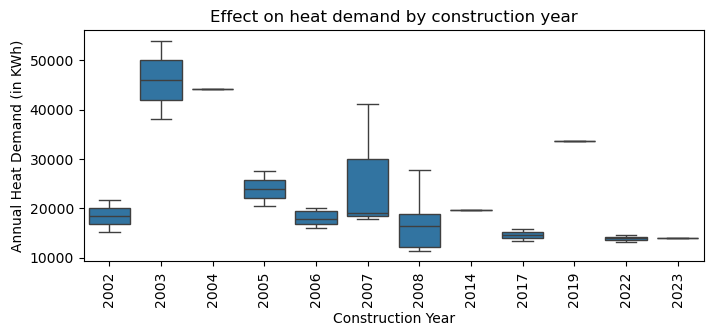

In [210]:
Q1 = non_zero_th_apt_2000s['KWh_th_a'].quantile(0.25)
Q3 = non_zero_th_apt_2000s['KWh_th_a'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (non_zero_th_apt['KWh_th_a'] >= Q1 - 1.5 * IQR) & (non_zero_th_apt['KWh_th_a'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(8,3))
chart = sns.boxplot(data = non_zero_th_apt_2000s.loc[filter],
            x = 'Age',
            y = 'KWh_th_a',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Construction Year', ylabel='Annual Heat Demand (in KWh)',title='Effect on heat demand by construction year') 


In [ ]:
Num_HH,full_space,building_volume

In [106]:
import statsmodels.api as sm 
import scipy 


In [108]:
x = non_zero_th_residential_apt['full_space'] 
y = non_zero_th_residential_apt['KWh_th_a']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.355e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:40:36   Log-Likelihood:                -28666.
No. Observations:                2497   AIC:                         5.734e+04
Df Residuals:                    2495   BIC:                         5.735e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.679e+04    716.673     23.423      0.0

In [109]:
x = non_zero_th_residential_apt['building_volume'] 
y = non_zero_th_residential_apt['KWh_th_a']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 2.132e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:42:20   Log-Likelihood:                -28778.
No. Observations:                2497   AIC:                         5.756e+04
Df Residuals:                    2495   BIC:                         5.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.175e+04    778.101     

In [113]:
x = non_zero_th_residential_apt[['Num_HH'] ]
y = non_zero_th_residential_apt['KWh_th_a']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     726.8
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          1.05e-140
Time:                        20:55:08   Log-Likelihood:                -31275.
No. Observations:                2497   AIC:                         6.255e+04
Df Residuals:                    2495   BIC:                         6.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.952e+04   2608.336     15.152      0.0

In [114]:
x = non_zero_th_residential_apt[['Age'] ]
y = non_zero_th_residential_apt['KWh_th_a']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     12.95
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           0.000326
Time:                        20:56:12   Log-Likelihood:                -31588.
No. Observations:                2497   AIC:                         6.318e+04
Df Residuals:                    2495   BIC:                         6.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.613e+05   1.28e+05      4.378      0.0

In [ ]:
x = non_zero_th_residential_apt[['full_space','Num_HH','building_volume'] ]
y = non_zero_th_residential_apt['KWh_th_a']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     8724.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:52:57   Log-Likelihood:                -28545.
No. Observations:                2497   AIC:                         5.710e+04
Df Residuals:                    2493   BIC:                         5.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6724.1657    931.163     

In [111]:
x = non_zero_th_residential_apt[['full_space','building_volume'] ]
y = non_zero_th_residential_apt['KWh_th_a']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:43:25   Log-Likelihood:                -28648.
No. Observations:                2497   AIC:                         5.730e+04
Df Residuals:                    2494   BIC:                         5.732e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.509e+04    766.101     

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(non_zero_th_residential_apt[['full_space','building_volume']],non_zero_th_residential_apt['KWh_th_a'], test_size=0.2, random_state=4)
print ('train set:', x_train.shape, y_train.shape)
print ('test set:', x_test.shape, y_test.shape)
x_train = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train, missing = 'drop').fit()
predicitons = model.predict(x_train)

print_model = model.summary()
print(print_model)

import sklearn.metrics as skm
#print(round(skm.mean_absolute_error(y_train, predicitons), 2))
#print(round(skm.r2_score(y_train, predicitons), 2))


train set: (1997, 2) (1997,)
test set: (500, 2) (500,)
                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     9555.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:35:29   Log-Likelihood:                -22952.
No. Observations:                1997   AIC:                         4.591e+04
Df Residuals:                    1994   BIC:                         4.593e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

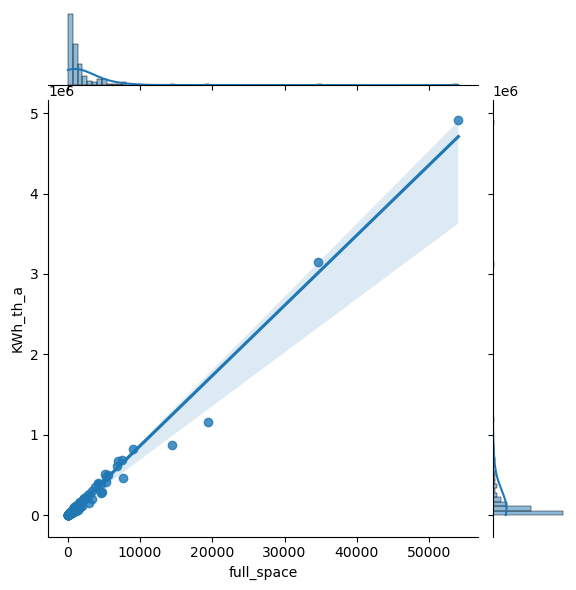

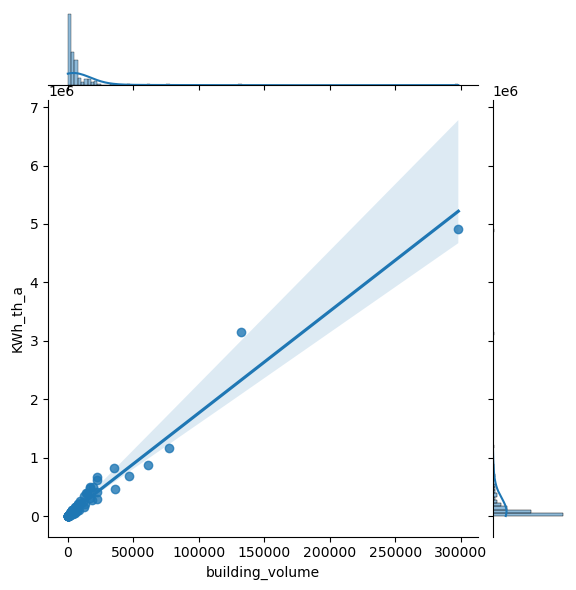

In [143]:
# Volume vs heat demand
sns.jointplot(x="full_space", y="KWh_th_a", data=non_zero_th_business_apt, kind="reg"); 
# Your answer goes here
sns.jointplot(x="building_volume", y="KWh_th_a", data=non_zero_th_business_apt, kind="reg"); 

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(non_zero_th_business_apt[['full_space','building_volume']],non_zero_th_business_apt['KWh_th_a'], test_size=0.2, random_state=4)
print ('train set:', x_train.shape, y_train.shape)
print ('test set:', x_test.shape, y_test.shape)
x_train = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train, missing = 'drop').fit()
predicitons = model.predict(x_train)

print_model = model.summary()
print(print_model)

import sklearn.metrics as skm
#print(round(skm.mean_absolute_error(y_train, predicitons), 2))
#print(round(skm.r2_score(y_train, predicitons), 2))


train set: (93, 2) (93,)
test set: (24, 2) (24,)
                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2851.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           4.09e-82
Time:                        21:40:06   Log-Likelihood:                -1177.9
No. Observations:                  93   AIC:                             2362.
Df Residuals:                      90   BIC:                             2369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

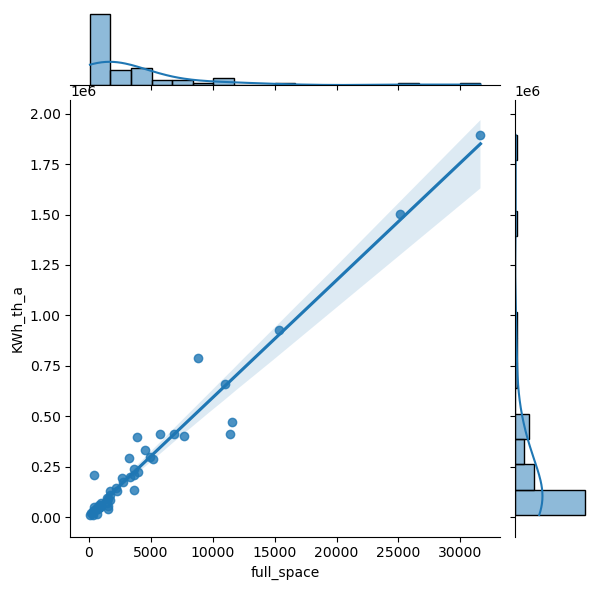

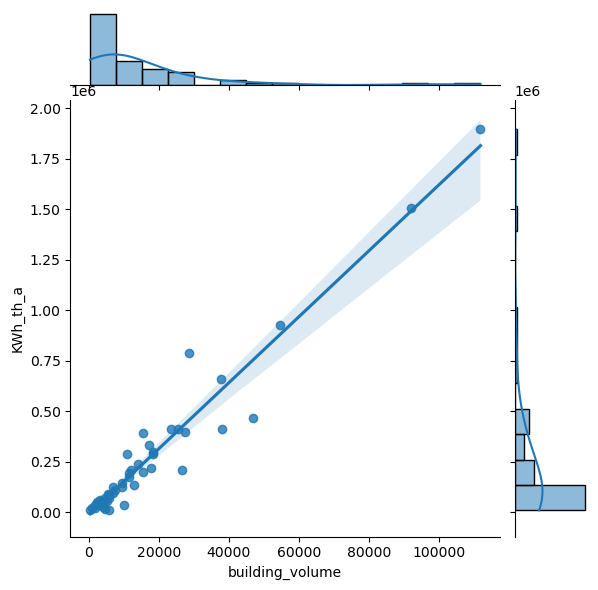

In [142]:
# Volume vs heat demand
sns.jointplot(x="full_space", y="KWh_th_a", data=non_zero_th_public_apt, kind="reg"); 
# Your answer goes here
sns.jointplot(x="building_volume", y="KWh_th_a", data=non_zero_th_public_apt, kind="reg"); 

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(non_zero_th_public_apt[['full_space','building_volume']],non_zero_th_public_apt['KWh_th_a'], test_size=0.2, random_state=4)
print ('train set:', x_train.shape, y_train.shape)
print ('test set:', x_test.shape, y_test.shape)
x_train = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train, missing = 'drop').fit()
predicitons = model.predict(x_train)

print_model = model.summary()
print(print_model)

import sklearn.metrics as skm
#print(round(skm.mean_absolute_error(y_train, predicitons), 2))
#print(round(skm.r2_score(y_train, predicitons), 2))


train set: (42, 2) (42,)
test set: (11, 2) (11,)
                            OLS Regression Results                            
Dep. Variable:               KWh_th_a   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     464.8
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           6.24e-28
Time:                        21:43:32   Log-Likelihood:                -525.00
No. Observations:                  42   AIC:                             1056.
Df Residuals:                      39   BIC:                             1061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Restoring the heating costs from 2015 based on different variables in hl.dta dataset

In [438]:
hl_df = pd.read_stata('data/SOEP_data_v38/hl.dta')
display(hl_df.shape)
hl_df = hl_df[['hid','cid','syear',
'hlc0005_h','hlf0074_h','hlf0019_h','hlf0069_h','hlf0016_v1','hlf0016_v2','hlj0023'
]].copy()

## Cast to apppropriate type ##
hl_df.hlc0005_h = hl_df.hlc0005_h.astype(str)
hl_df.hlf0074_h = hl_df.hlf0074_h.astype(str)
hl_df.hlf0019_h = hl_df.hlf0019_h.astype(str)
hl_df.hlf0069_h = hl_df.hlf0069_h.astype(str)
hl_df.hlf0016_v1 = hl_df.hlf0016_v1.astype(str)
hl_df.hlf0016_v2 = hl_df.hlf0016_v2.astype(str)
hl_df.hlj0023 = hl_df.hlj0023.astype(str)

## replace the -ve rating/questions with NaN ##
hl_df = hl_df.replace(r'^.*-.*$', np.nan, regex=True).sort_values(by=['syear','hid'])

hl_df.hlc0005_h = hl_df.hlc0005_h.astype(float)
hl_df.hlf0074_h = hl_df.hlf0074_h.astype(float)
hl_df.hlf0019_h = hl_df.hlf0019_h.astype(float)
hl_df.hlf0069_h = hl_df.hlf0069_h.astype(float)
hl_df.hlj0023 = hl_df.hlj0023.astype(float)


hl_df.rename(columns={
    'hlc0005_h' :"HH Monthly income",
    'hlf0074_h' :"monthly rent",
    'hlf0019_h' :"size of unit in sq meters",
    'hlf0069_h' :"Average Monthly Heating Costs",
    'hlf0016_v1' : "Construction Year v1",
    'hlf0016_v2' : "Construction Year v2",
    'hlj0023': 'Number of persons in dwelling unit'
    
},inplace=True)


#hl_HH_monthly_income_df = hl_HH_monthly_income_df.dropna(subset=['Occupancy Type']).reset_index(drop=True)
#hl_HH_monthly_income_df = hl_HH_monthly_income_df[~hl_HH_monthly_income_df['Occupancy Type'].str.contains('Altersheim')].reset_index(drop=True)
hl_df.info()

display(hl_df.isna().sum())
#hl_HH_monthly_income_df

#hlj0024

(211812, 1515)

<class 'pandas.core.frame.DataFrame'>
Index: 211812 entries, 0 to 207079
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   hid                                 211812 non-null  category
 1   cid                                 211812 non-null  category
 2   syear                               211812 non-null  category
 3   HH Monthly income                   200625 non-null  float64 
 4   monthly rent                        109655 non-null  float64 
 5   size of unit in sq meters           161312 non-null  float64 
 6   Average Monthly Heating Costs       73749 non-null   float64 
 7   Construction Year v1                43291 non-null   object  
 8   Construction Year v2                385 non-null     object  
 9   Number of persons in dwelling unit  1740 non-null    float64 
dtypes: category(3), float64(5), object(2)
memory usage: 15.8+ MB


hid                                        0
cid                                        0
syear                                      0
HH Monthly income                      11187
monthly rent                          102157
size of unit in sq meters              50500
Average Monthly Heating Costs         138063
Construction Year v1                  168521
Construction Year v2                  211427
Number of persons in dwelling unit    210072
dtype: int64

"""hlf0582: Biomass: Heating
hlf0585: Monthly Amt.: Biomass
hlf0586: Yearly Amt.: Biomass

hlf0570: Coal: Heating
hlf0574: Monthly Amt.: Coal
hlf0575: Yearly Amt.: Coal

hlf0540: District Heat: Heating
hlf0543: Monthly Amt.: District Heat
hlf0544: Yearly Amt.: District Heat

hlf0557: Electricity: Heating
hlf0562: Monthly Amt.: Electricity
hlf0563: Yearly Amt.: Electricity

hlf0589: Environmental Heat: Heating

hlf0545: Gas: Heating
hlf0549: Monthly Amt.: Gas
hlf0550: Yearly Amt.: Gas

hlf0564: Heating Oil: Heating
hlf0568: Monthly Amt.: Heating Oil
hlf0569: Yearly Amt.: Heating Oil

hlf0551: Liquid Gas: Heating
hlf0555: Monthly Amt.: Liquid Gas
hlf0556: Yearly Amt.: Liquid Gas

hlf0576: Wood/Pellets: Heating
hlf0580: Monthly Amt.: Wood/Pellets
hlf0581: Yearly Amt.: Wood/Pellets

hlf0074_h: [de] Amount of monthly rent [harmonized]
hlf0069_h: [de] Flat rate or average monthly heating costs [harmonized]


"""

In [439]:
#hl_df[(hl_df['hlf0582'] == 1)][['hid','syear','hlf0582','hlf0570','hlf0540','hlf0557','hlf0589','hlf0545','hlf0564','hlf0551','hlf0576','hlf0585','hlf0574','hlf0543','hlf0562','hlf0549','hlf0568','hlf0555','hlf0580']]

In [440]:
temp_df = pd.read_stata('data/SOEP_data_v38/hl.dta')
display(temp_df.shape)
hl_df_cp = temp_df[['syear','hid','hlf0585','hlf0574','hlf0543','hlf0562','hlf0549','hlf0568','hlf0555','hlf0580','hlf0069_h']].copy()
hl_df_cp.hlf0585 = hl_df_cp.hlf0585.astype(str)
hl_df_cp.hlf0574 = hl_df_cp.hlf0574.astype(str)
hl_df_cp.hlf0543 = hl_df_cp.hlf0543.astype(str)
hl_df_cp.hlf0562 = hl_df_cp.hlf0562.astype(str)
hl_df_cp.hlf0549 = hl_df_cp.hlf0549.astype(str)
hl_df_cp.hlf0568 = hl_df_cp.hlf0568.astype(str)
hl_df_cp.hlf0555 = hl_df_cp.hlf0555.astype(str)
hl_df_cp.hlf0580 = hl_df_cp.hlf0580.astype(str)
hl_df_cp.hlf0069_h = hl_df_cp.hlf0069_h.astype(str)

## replace the -ve rating/questions with NaN ##
hl_df_cp = hl_df_cp.replace(r'^.*-.*$', np.nan, regex=True).sort_values(by=['syear','hid'])
hl_df_cp.shape

hl_df_cp.hlf0585 = hl_df_cp.hlf0585.astype(float)
hl_df_cp.hlf0574 = hl_df_cp.hlf0574.astype(float)
hl_df_cp.hlf0543 = hl_df_cp.hlf0543.astype(float)
hl_df_cp.hlf0562 = hl_df_cp.hlf0562.astype(float)
hl_df_cp.hlf0549 = hl_df_cp.hlf0549.astype(float)
hl_df_cp.hlf0568 = hl_df_cp.hlf0568.astype(float)
hl_df_cp.hlf0555 = hl_df_cp.hlf0555.astype(float)
hl_df_cp.hlf0580 = hl_df_cp.hlf0580.astype(float)
hl_df_cp.hlf0069_h = hl_df_cp.hlf0069_h.astype(float)

hl_df_cp.shape

(211812, 1515)

(211812, 11)

In [441]:
loc_2015 =  (temp_df['syear'] == 2015)
hl_df_cp.loc[loc_2015,'hlf0069_h'] = hl_df_cp[loc_2015][['hlf0585','hlf0574','hlf0543','hlf0562','hlf0549','hlf0568','hlf0555','hlf0580']].sum(axis=1)
hl_df_cp[loc_2015]['hlf0069_h'].describe()


/var/folders/lf/ll61rjv55tg86jht8cn9g9f80000gn/T/ipykernel_85664/892129600.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hl_df_cp.loc[loc_2015,'hlf0069_h'] = hl_df_cp[loc_2015][['hlf0585','hlf0574','hlf0543','hlf0562','hlf0549','hlf0568','hlf0555','hlf0580']].sum(axis=1)
/var/folders/lf/ll61rjv55tg86jht8cn9g9f80000gn/T/ipykernel_85664/892129600.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hl_df_cp[loc_2015]['hlf0069_h'].describe()


count    8000.00000
mean      112.89200
std        97.71363
min         0.00000
25%        35.00000
50%       100.00000
75%       170.00000
max       932.00000
Name: hlf0069_h, dtype: float64

In [442]:
hl_df[['Average Monthly Heating Costs']] = hl_df_cp[['hlf0069_h']]
hl_df[['Average Monthly Heating Costs']]

Average Monthly Heating Costs
0                                 NaN
40                                NaN
43                                NaN
74                                NaN
80                                NaN
...                               ...
203265                          200.0
207762                            NaN
203819                           50.0
211421                          100.0
207079                           75.0

[211812 rows x 1 columns]

[Text(0.5, 0, 'Survey Year'),
 Text(0, 0.5, 'Average Monthly Heating Costs (in Euros)'),
 Text(0.5, 1.0, 'Heating costs over the years')]

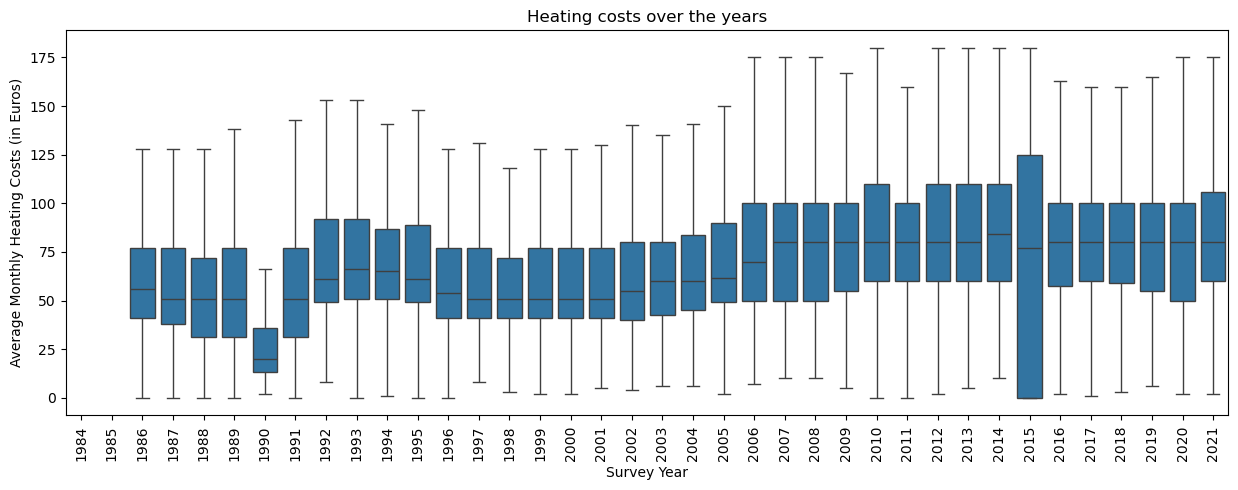

In [443]:
Q1 = hl_df['Average Monthly Heating Costs'].quantile(0.25)
Q3 = hl_df['Average Monthly Heating Costs'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (hl_df['Average Monthly Heating Costs'] >= Q1 - 1.5 * IQR) & (hl_df['Average Monthly Heating Costs'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(15,5))
chart = sns.boxplot(
            data = hl_df.loc[filter],
            #data = hl_df,
            #data = non_zero_th_apt_2000s,
            x = 'syear',
            y = 'Average Monthly Heating Costs',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Average Monthly Heating Costs (in Euros)',title='Heating costs over the years') 


We can ignore the lower end of the 2015 data as this was contructed based on composition of multiple questions in survey\
The important point to notice is that the mean and median values are in the same range as neighbouring years

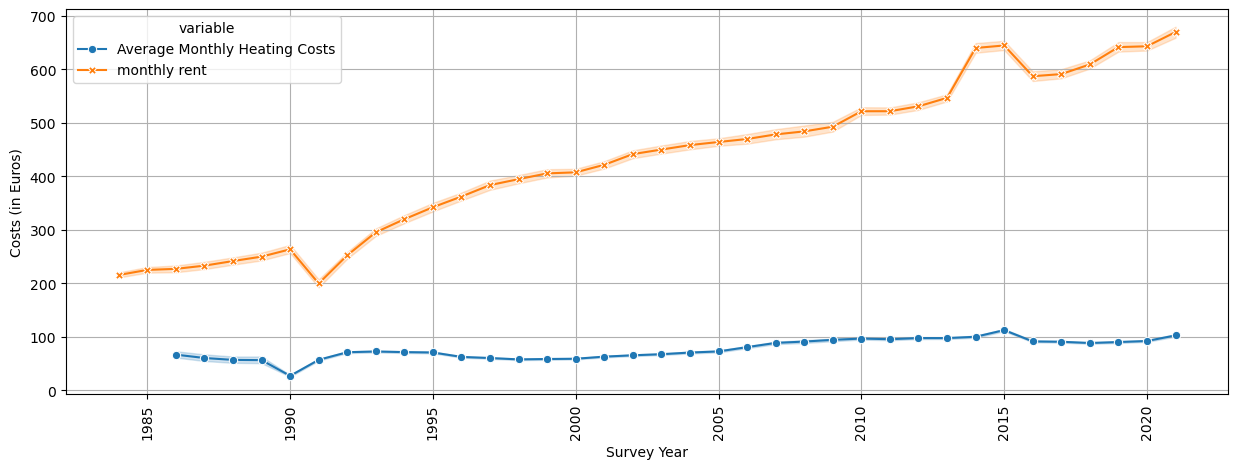

In [444]:
plt.figure(figsize=(15,5))
data = hl_df[['syear','Average Monthly Heating Costs','monthly rent']].copy()
chart = sns.lineplot(x='syear', y='value', hue='variable', data=pd.melt(data, ['syear']), style="variable", markers=True, dashes=False)
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Costs (in Euros)') 
plt.grid() 
plt.show()

[Text(0.5, 0, 'Survey Year'),
 Text(0, 0.5, 'Household Monthly income (in Euros)'),
 Text(0.5, 1.0, 'Household Monthly income over the years')]

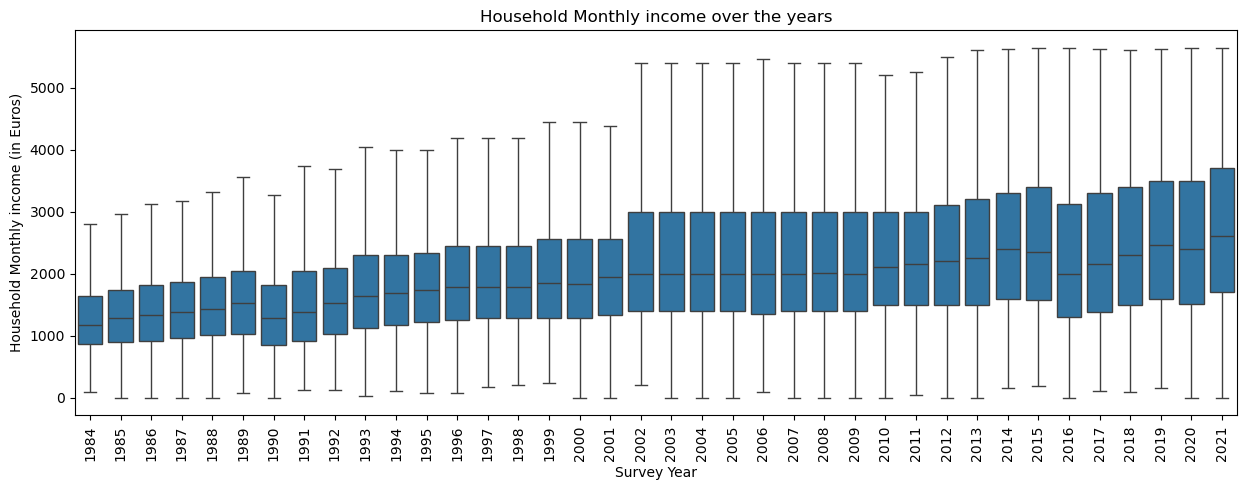

In [445]:
Q1 = hl_df['HH Monthly income'].quantile(0.25)
Q3 = hl_df['HH Monthly income'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (hl_df['HH Monthly income'] >= Q1 - 1.5 * IQR) & (hl_df['HH Monthly income'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(15,5))
chart = sns.boxplot(
            data = hl_df.loc[filter],
            #data = hl_df,
            #data = non_zero_th_apt_2000s,
            x = 'syear',
            y = 'HH Monthly income',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Household Monthly income (in Euros)',title='Household Monthly income over the years') 


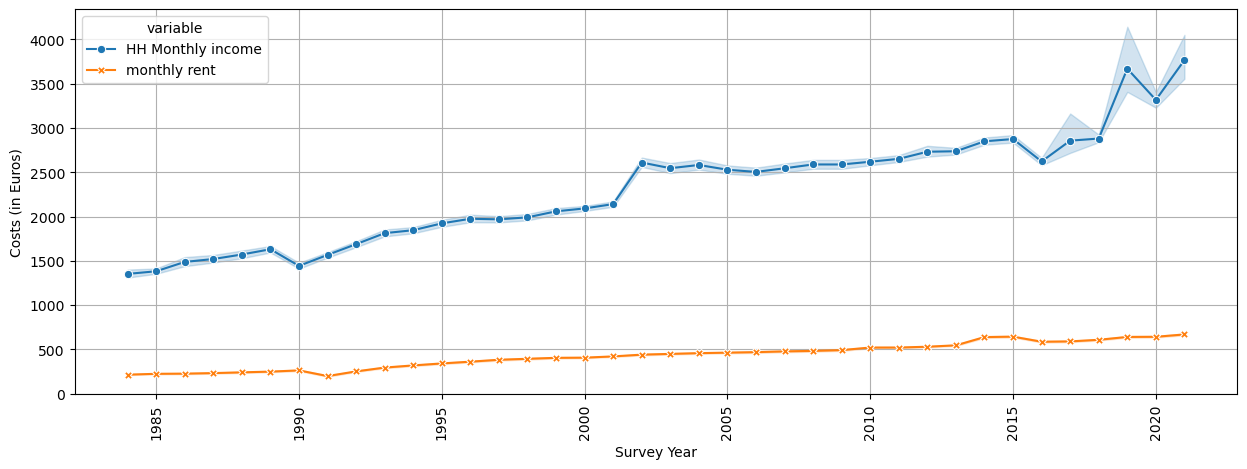

In [446]:
plt.figure(figsize=(15,5))
data = hl_df[['syear','HH Monthly income','monthly rent']].copy()
chart = sns.lineplot(x='syear', y='value', hue='variable', data=pd.melt(data, ['syear']), style="variable", markers=True, dashes=False)
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Costs (in Euros)') 
plt.grid() 
plt.show()

Exploring why people prefer gas over the electric heater type\
and what is driving the prices up

In [463]:
hh_energy_prices_df = pd.read_csv('data/External/genesis_HH_energy_prices_over_the_years.csv')
hh_energy_prices_df['Cost of Natural gas (cents/KWh)'] = hh_energy_prices_df['Cost of Natural gas (cents/KWh)'].apply(lambda x: x.replace(',','.')).astype(float)
hh_energy_prices_df['Cost of Electricity (cents/KWh)'] = hh_energy_prices_df['Cost of Electricity (cents/KWh)'].apply(lambda x: x.replace(',','.')).astype(float)
hh_energy_prices_df.head()
display(hh_energy_prices_df.shape)
hh_energy_prices_df.head()

(32, 9)

Year  Cost of Light heating oil (euros/100L)  \
0  1991                                   26.38   
1  1992                                   24.34   
2  1993                                   24.77   
3  1994                                   23.08   
4  1995                                   21.94   

   Cost of Light heating oil (cents/KWh)  Cost of Natural gas (cents/KWh)  \
0                                   2.54                             2.87   
1                                   2.34                             2.88   
2                                   2.38                             2.76   
3                                   2.22                             2.74   
4                                   2.11                             2.62   

   Cost of Electricity (cents/KWh)  \
0                             9.41   
1                             9.62   
2                             9.82   
3                             9.78   
4                             9.74   

   Cost of briquettes and pellets (euros/100 kg)  \
0                                          22.39   
1                                          23.52   
2                                          24.90   
3                                          25.72   
4                                          26.24   

   Cost of briquettes and pellets (cents/KWh)  \
0                                        4.00   
1                                        4.20   
2                                        4.45   
3                                        4.59   
4                                        4.69   

   Cost of District heating (euros/GJ)  Cost of District heating (cents/KWh)  
0                                11.86                                  4.27  
1                                11.89                                  4.28  
2                                12.29                                  4.42  
3                                12.30                                  4.42  
4                                12.34                                  4.44

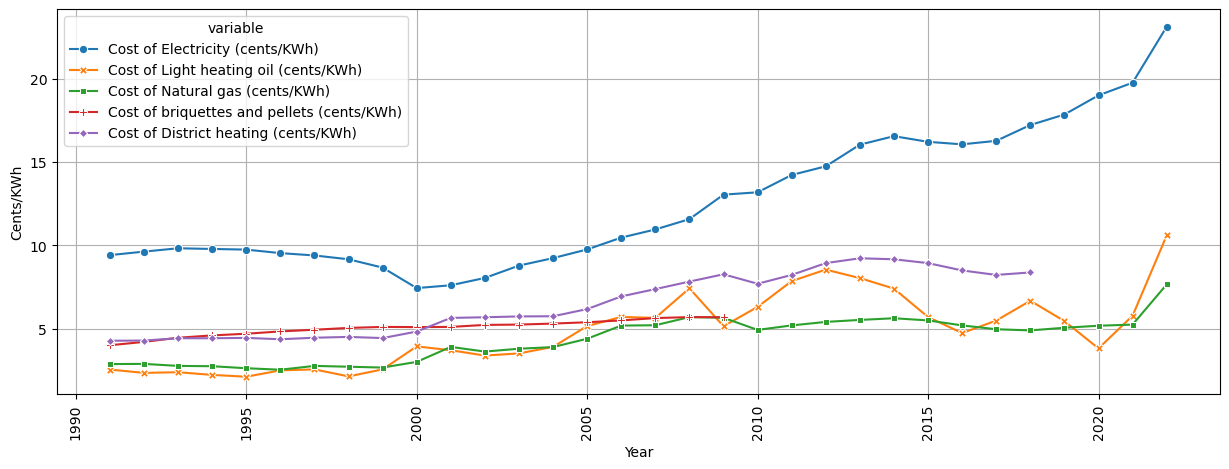

In [465]:
plt.figure(figsize=(15,5))
data = hh_energy_prices_df[['Year',
'Cost of Electricity (cents/KWh)',
'Cost of Light heating oil (cents/KWh)',
'Cost of Natural gas (cents/KWh)',
'Cost of briquettes and pellets (cents/KWh)',
'Cost of District heating (cents/KWh)'
]].copy()
chart = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data, ['Year']), style="variable", markers=True, dashes=False)
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Year', ylabel='Cents/KWh') 
plt.grid() 
plt.show()

Natural Gas is cheaper on average and then heating oil followed by District heating\
Electricity is epensive and thus it drives people away from using it as the primary type of heater.\
Next up we would look into the import and export of the gas and crude oil

In [476]:
hh_energy_expense_df = pd.read_csv('data/External/Genesis_HH_energy_espense.csv')
display(hh_energy_expense_df.shape)
hh_energy_expense_df['Annual expenditure on enegery excluding fuels'] = hh_energy_expense_df['Annual expenditure on enegery excluding fuels'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
hh_energy_expense_df['Annual expenditure on Space heating and hot water'] = hh_energy_expense_df['Annual expenditure on Space heating and hot water'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
hh_energy_expense_df['Annual expenditure on Fuels'] = hh_energy_expense_df['Annual expenditure on Fuels'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
hh_energy_expense_df['Total energy expenditure'] = hh_energy_expense_df['Total energy expenditure'].astype(str).apply(lambda x: x.replace(',','')).astype(float)

hh_energy_expense_df.head()

(29, 15)

Year  Annual expenditure on Space heating and hot water  \
0  1990                                              521.0   
1  1991                                              644.0   
2  1992                                              601.0   
3  1993                                                NaN   
4  1994                                                NaN   

   Annual expenditure on Process heat (cooking)  \
0                                          91.0   
1                                         104.0   
2                                         112.0   
3                                           NaN   
4                                           NaN   

   Annual expenditure on Light/Other  \
0                              214.0   
1                              238.0   
2                              249.0   
3                                NaN   
4                                NaN   

   Annual expenditure on enegery excluding fuels  Annual expenditure on Fuels  \
0                                          826.0                        715.0   
1                                          985.0                        803.0   
2                                          961.0                        833.0   
3                                            NaN                          NaN   
4                                            NaN                          NaN   

   Total energy expenditure  \
0                    1540.0   
1                    1788.0   
2                    1794.0   
3                       NaN   
4                       NaN   

   Annual expenditure on heat per m² of living space in euros  \
0                                                6.0            
1                                                8.0            
2                                                7.0            
3                                                NaN            
4                                                NaN            

   Expenditure on fuel per 100 km driven in euros  \
0                                             5.0   
1                                             5.0   
2                                             6.0   
3                                             NaN   
4                                             NaN   

   Monthly energy expenditure Space heating and hot water  \
0                                               43.0        
1                                               54.0        
2                                               50.0        
3                                                NaN        
4                                                NaN        

   Monthly energy expenditure Process heat (cooking)  \
0                                                8.0   
1                                                9.0   
2                                                9.0   
3                                                NaN   
4                                                NaN   

   Monthly energy expenditure Light/Other  \
0                                    18.0   
1                                    20.0   
2                                    21.0   
3                                     NaN   
4                                     NaN   

   Monthly energy expenditure  excluding fuels  \
0                                         69.0   
1                                         82.0   
2                                         80.0   
3                                          NaN   
4                                          NaN   

   Monthly energy expenditure Fuels  Total Monthly energy expenditure  
0                              60.0                             128.0  
1                              67.0                             149.0  
2                              69.0                             150.0  
3                               NaN                               NaN  
4                               NaN                           

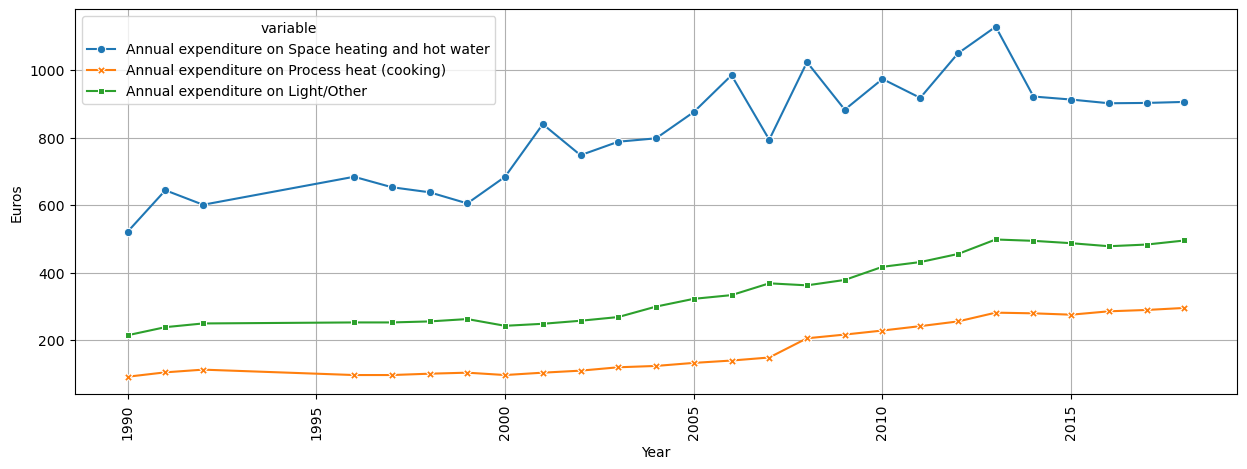

In [485]:
plt.figure(figsize=(15,5))
data = hh_energy_expense_df[['Year',
'Annual expenditure on Space heating and hot water',
'Annual expenditure on Process heat (cooking)',
'Annual expenditure on Light/Other',
#'Annual expenditure on Fuels'
]].copy()
chart = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data, ['Year']), style="variable", markers=True, dashes=False)
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Year', ylabel='Euros') 
plt.grid() 
plt.show()

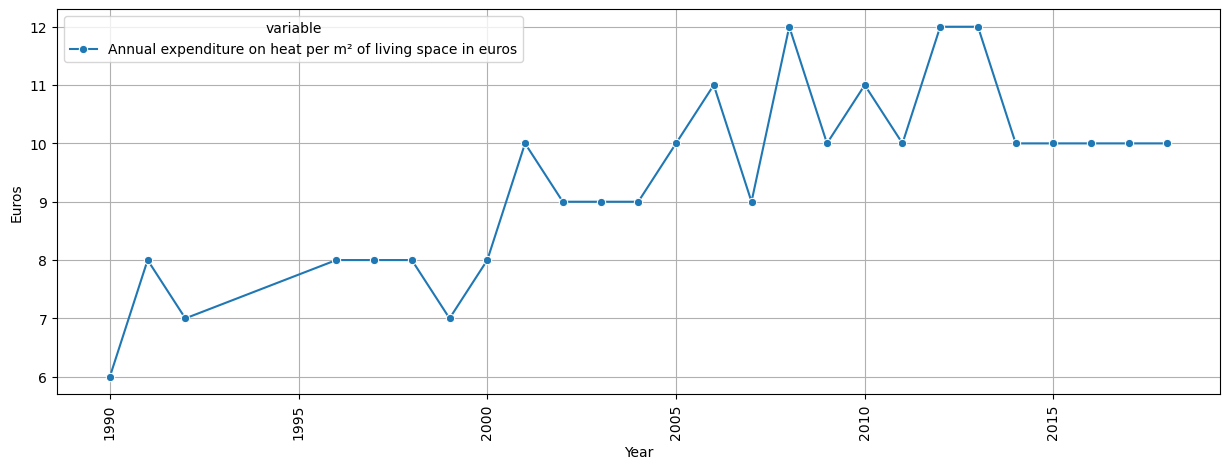

In [479]:
plt.figure(figsize=(15,5))
data = hh_energy_expense_df[['Year','Annual expenditure on heat per m² of living space in euros'
]].copy()
chart = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data, ['Year']), style="variable", markers=True, dashes=False)
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Year', ylabel='Euros') 
plt.grid() 
plt.show()

Comment by Ravi 29.01.24 23:27

I cleaned data from external sources over the weekend and added few new plots regarding the prices changes over the years for different heating soruces.

Next Need to convert the heating costs from hl.dta to KWh based on cents/KWh data from "genesis_HH_energy_prices_over_the_years.csv" file\
and that way we can compare hl.dta heating demand in kWh to DigEn heat demand KWh

Can you guys next look into the below site "https://www.destatis.de/EN/Themes/Society-Environment/Environment/Material-Energy-Flows/Tables/electricity-consumption-households.html#fussnote-1-59944" \
I was planning to plot a graph that shows the different values of heat demand per HH based on the Number of ppl in HH
Can you manually copy the data from the above page for this graph


Further It would be great if we can show the diffrences in Import and export of Gas. Along with the usage of gas and electricity from "Production_consumption_in_TWh.csv" file \
I was thinking that if we could show the higher import rates of gas, we can show why the the costs of gas have increased and how it is contributing to the increase in prices on electricity.\
Let me know what you think of this and if we can show this from the data files.

I will be back on wednesday evening and will continue with the space analysis from hl.dta data and create a regression model and will compare that to the last week's model

Main idea behind above data for me is can we dig into the factors that are increasing the energy demand and increase in prices of the different energy sources. \
Could you please continue with the data and if need you can further exlore the following site for more data "https://www-genesis.destatis.de/genesis/online".


merging hl_df and energy cost df to get the heat demand in KWh 

In [600]:
dfinal = hl_df.merge(hh_energy_prices_df, how='inner', left_on='syear', right_on='Year')
dfinal['heat_demand_kWh_monthly'] = dfinal['Average Monthly Heating Costs'] * (100)/dfinal['Cost of Natural gas (cents/KWh)']
dfinal['heat_demand_kWh_Annual'] = dfinal['heat_demand_kWh_monthly']*12
dfinal['Heating costs Per sqm'] = dfinal['Average Monthly Heating Costs']/dfinal['size of unit in sq meters']
LC_val_df = dfinal[['syear','HH Monthly income']].groupby('syear').quantile(0.20).reset_index().rename(columns={'HH Monthly income':'LC_val'})
UC_val_df = dfinal[['syear','HH Monthly income']].groupby('syear').quantile(0.80).reset_index().rename(columns={'HH Monthly income':'UC_val'})
dfinal = dfinal.merge(LC_val_df, how='inner', left_on='syear', right_on='syear')
dfinal = dfinal.merge(UC_val_df, how='inner', left_on='syear', right_on='syear')


dfinal['Class'] = np.nan
LC_loc = (dfinal['HH Monthly income'] <= dfinal['LC_val'])
dfinal.loc[LC_loc,'Class'] = 'Lower Class'

MC_loc = (dfinal['HH Monthly income'] > dfinal['LC_val']) & (dfinal['HH Monthly income'] < dfinal['UC_val'])
dfinal.loc[MC_loc,'Class'] = 'Middle Class'

UC_loc = (dfinal['HH Monthly income'] >= dfinal['UC_val'])
dfinal.loc[UC_loc,'Class'] = 'Upper Class'
dfinal


display(dfinal.shape)
dfinal




(193990, 26)

hid      cid  syear  HH Monthly income  monthly rent  \
0            94       94   1991              971.0         246.0   
1           116      116   1991             1329.0         230.0   
2           124      124   1991             1240.0         302.0   
3           132      132   1991              890.0         256.0   
4           191      191   1991              511.0         205.0   
...         ...      ...    ...                ...           ...   
193985  5557630  3681998   2021             3735.0         800.0   
193986  5557700  3879992   2021                NaN         290.0   
193987  5557730  3713903   2021              700.0         280.0   
193988  5557810  5487430   2021             1000.0         800.0   
193989  5557850  3858375   2021                NaN        1000.0   

        size of unit in sq meters  Average Monthly Heating Costs  \
0                             NaN                           51.0   
1                             NaN                           28.0   
2                             NaN                           51.0   
3                             NaN                           61.0   
4                             NaN                           66.0   
...                           ...                            ...   
193985                       58.0                          200.0   
193986                       35.0                            NaN   
193987                       23.0                           50.0   
193988                       64.0                          100.0   
193989                      120.0                           75.0   

       Construction Year v1 Construction Year v2  \
0                       NaN                  NaN   
1                       NaN                  NaN   
2                       NaN                  NaN   
3                       NaN                  NaN   
4                       NaN                  NaN   
...                     ...                  ...   
193985                  NaN                  NaN   
193986                  NaN                  NaN   
193987                  NaN                  NaN   
193988                  NaN                  NaN   
193989                  NaN                  NaN   

        Number of persons in dwelling unit  ...  \
0                                      NaN  ...   
1                                      NaN  ...   
2                                      NaN  ...   
3                                      NaN  ...   
4                                      NaN  ...   
...                                    ...  ...   
193985                                 NaN  ...   
193986                                 NaN  ...   
193987                                 NaN  ...   
193988                                 NaN  ...   
193989                                 NaN  ...   

       Cost of Electricity (cents/KWh)  \
0                                 9.41   
1                                 9.41   
2                                 9.41   
3                                 9.41   
4                                 9.41   
...                                ...   
193985                           19.76   
193986                           19.76   
193987                           19.76   
193988                           19.76   
193989                           19.76   

       Cost of briquettes and pellets (euros/100 kg)  \
0                                              22.39   
1                                              22.39   
2                                              22.39   
3                                              22.39   
4                                              22.39   
...                                              ...   
193985                                           NaN   
193986                                           NaN   
193987                                           NaN   
193988                                           NaN   
193989             

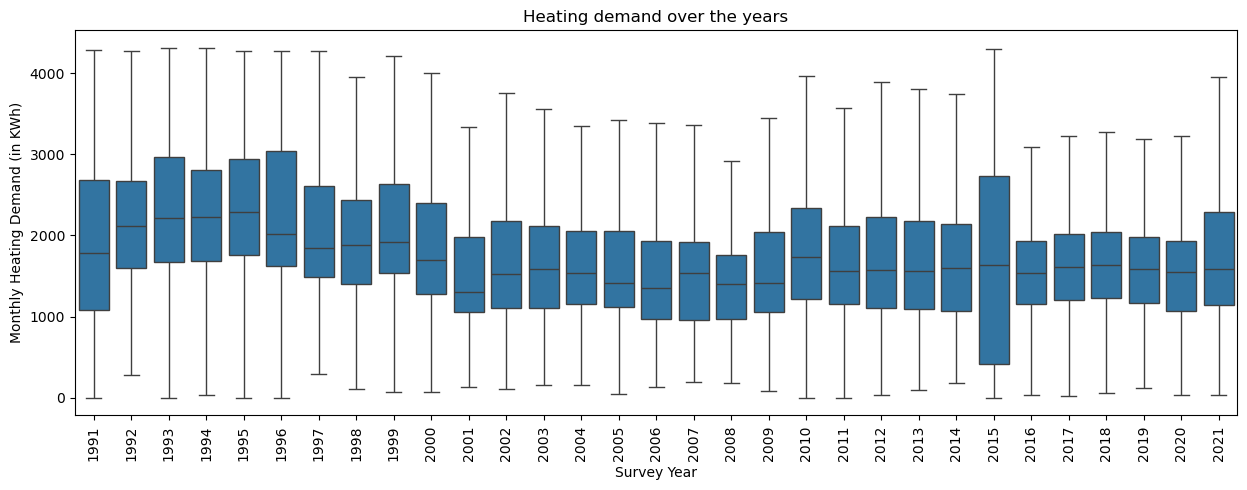

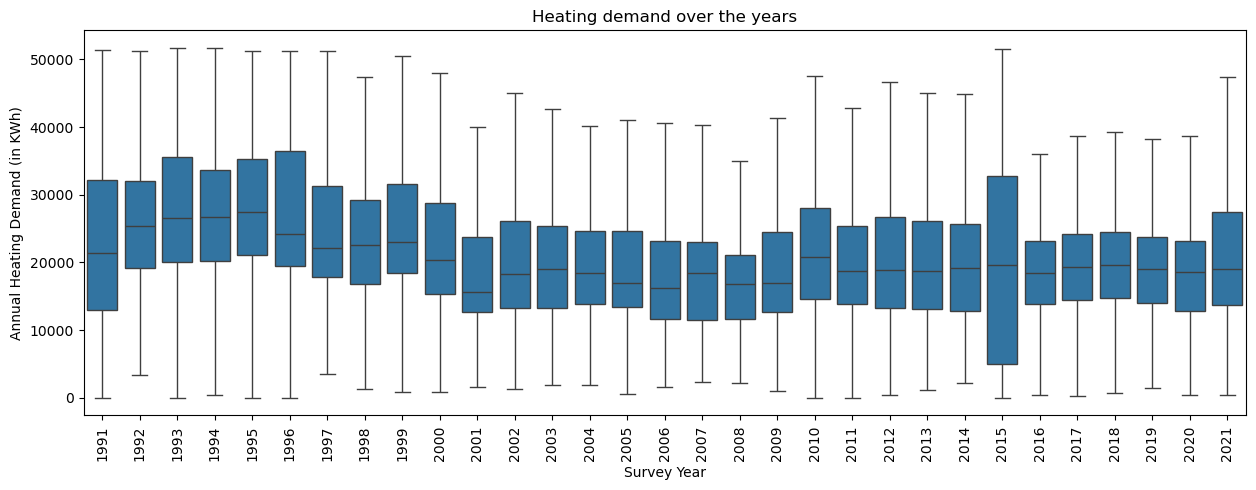

In [538]:
Q1 = dfinal['heat_demand_kWh_monthly'].quantile(0.25)
Q3 = dfinal['heat_demand_kWh_monthly'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfinal['heat_demand_kWh_monthly'] >= Q1 - 1.5 * IQR) & (dfinal['heat_demand_kWh_monthly'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(15,5))
chart = sns.boxplot(
            data = dfinal.loc[filter],
            #data = hl_df,
            #data = non_zero_th_apt_2000s,
            x = 'syear',
            y = 'heat_demand_kWh_monthly',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Monthly Heating Demand (in KWh)',title='Heating demand over the years')  
plt.show()

Q1 = dfinal['heat_demand_kWh_Annual'].quantile(0.25)
Q3 = dfinal['heat_demand_kWh_Annual'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfinal['heat_demand_kWh_Annual'] >= Q1 - 1.5 * IQR) & (dfinal['heat_demand_kWh_Annual'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(15,5))
chart = sns.boxplot(
            data = dfinal.loc[filter],
            #data = hl_df,
            #data = non_zero_th_apt_2000s,
            x = 'syear',
            y = 'heat_demand_kWh_Annual',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Annual Heating Demand (in KWh)',title='Heating demand over the years') 
plt.show()

The above result indicates that average annual heat demand through survey is around 20000 to 50000 KWh. this data is from SOEP data and in DigEn data shows the values to be too high, around 100k KWh. Since the values were imputed that may also be the reason for this huge difference.

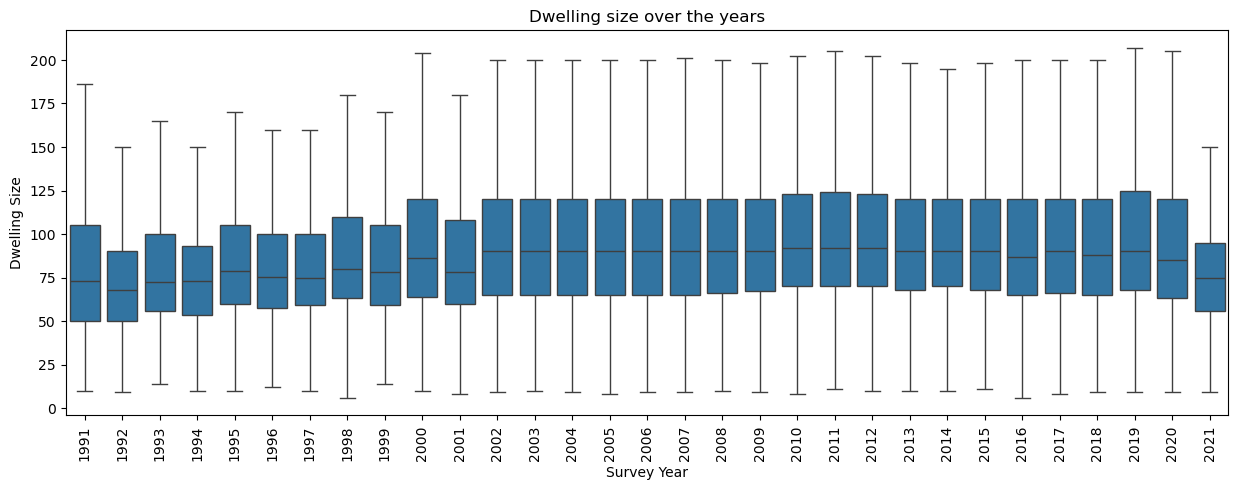

In [541]:
#dfinal['size of unit in sq meters'].isna().value_counts()
Q1 = dfinal['size of unit in sq meters'].quantile(0.25)
Q3 = dfinal['size of unit in sq meters'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfinal['size of unit in sq meters'] >= Q1 - 1.5 * IQR) & (dfinal['size of unit in sq meters'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(15,5))
chart = sns.boxplot(
            data = dfinal.loc[filter],
            #data = hl_df,
            #data = non_zero_th_apt_2000s,
            x = 'syear',
            y = 'size of unit in sq meters',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Dwelling Size',title='Dwelling size over the years')  
plt.show()


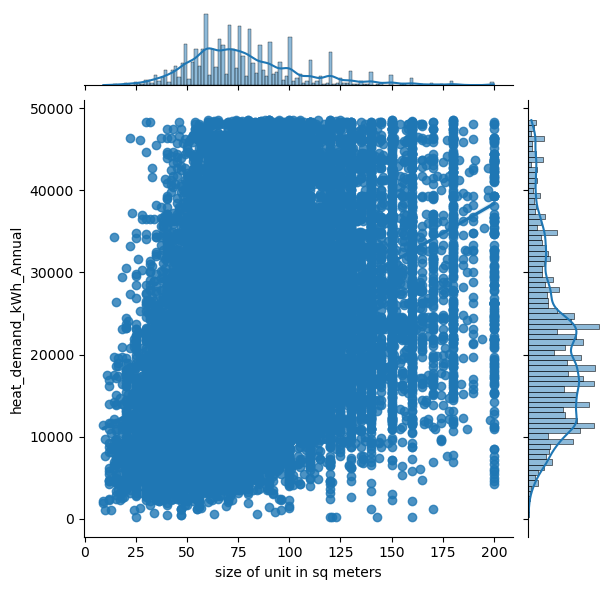

                              OLS Regression Results                              
Dep. Variable:     heat_demand_kWh_Annual   R-squared:                       0.198
Model:                                OLS   Adj. R-squared:                  0.198
Method:                     Least Squares   F-statistic:                 1.499e+04
Date:                    Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                            20:54:15   Log-Likelihood:            -6.5762e+05
No. Observations:                   60885   AIC:                         1.315e+06
Df Residuals:                       60883   BIC:                         1.315e+06
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [560]:
data = dfinal.copy()
data = data[~(data['heat_demand_kWh_Annual'] == 0)]
Q1 = data['size of unit in sq meters'].quantile(0.25)
Q3 = data['size of unit in sq meters'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['size of unit in sq meters'] >= Q1 - 1.5 * IQR) & (data['size of unit in sq meters'] <= Q3 + 1.5 *IQR)

data = data.loc[filter]
Q1 = data['heat_demand_kWh_Annual'].quantile(0.25)
Q3 = data['heat_demand_kWh_Annual'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['heat_demand_kWh_Annual'] >= Q1 - 1.5 * IQR) & (data['heat_demand_kWh_Annual'] <= Q3 + 1.5 *IQR)

sns.jointplot(x="size of unit in sq meters", y="heat_demand_kWh_Annual", data=data.loc[filter], kind="reg"); 
plt.show()


x = data['size of unit in sq meters'] 
y = data['heat_demand_kWh_Annual']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)


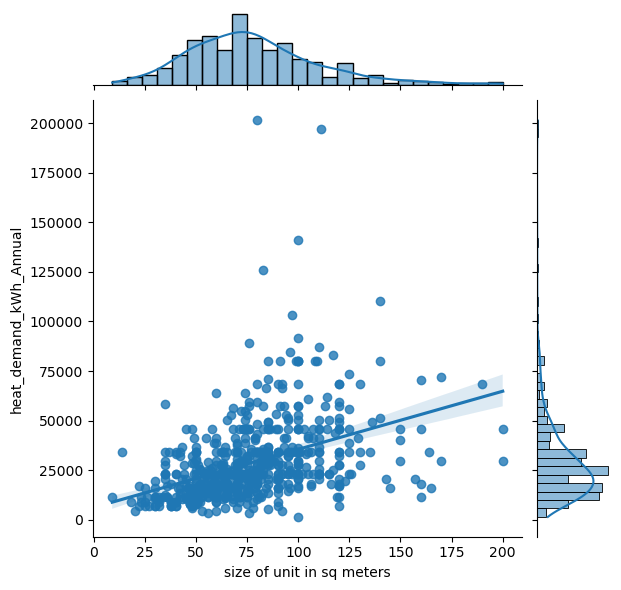

                              OLS Regression Results                              
Dep. Variable:     heat_demand_kWh_Annual   R-squared:                       0.166
Model:                                OLS   Adj. R-squared:                  0.165
Method:                     Least Squares   F-statistic:                     124.9
Date:                    Wed, 31 Jan 2024   Prob (F-statistic):           1.46e-26
Time:                            20:55:40   Log-Likelihood:                -7070.3
No. Observations:                     628   AIC:                         1.414e+04
Df Residuals:                         626   BIC:                         1.415e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [561]:

soep_2021 = data[(data.syear == 2021)]
sns.jointplot(x="size of unit in sq meters", y="heat_demand_kWh_Annual", data=soep_2021, kind="reg"); 
plt.show()
x = soep_2021['size of unit in sq meters'] 
y = soep_2021['heat_demand_kWh_Annual']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)


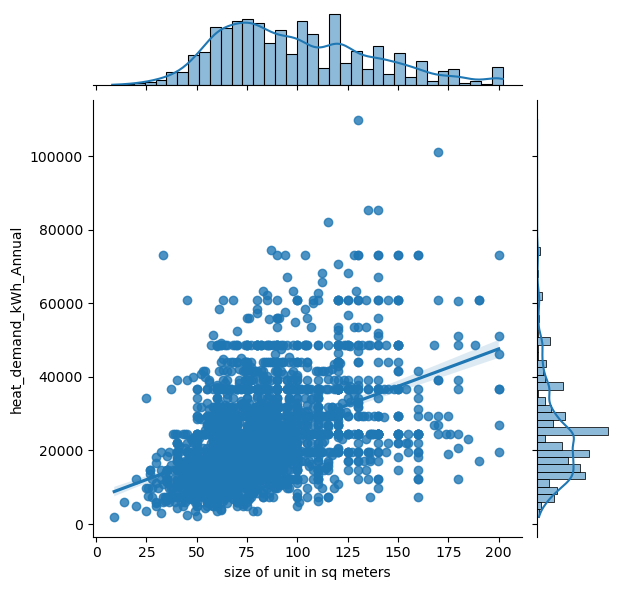

                              OLS Regression Results                              
Dep. Variable:     heat_demand_kWh_Annual   R-squared:                       0.207
Model:                                OLS   Adj. R-squared:                  0.207
Method:                     Least Squares   F-statistic:                     733.2
Date:                    Wed, 31 Jan 2024   Prob (F-statistic):          1.09e-143
Time:                            20:55:49   Log-Likelihood:                -30208.
No. Observations:                    2814   AIC:                         6.042e+04
Df Residuals:                        2812   BIC:                         6.043e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [562]:

soep_2010 = data[(data.syear == 2010)]
sns.jointplot(x="size of unit in sq meters", y="heat_demand_kWh_Annual", data=soep_2010, kind="reg"); 
plt.show()
x = soep_2010['size of unit in sq meters'] 
y = soep_2010['heat_demand_kWh_Annual']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)


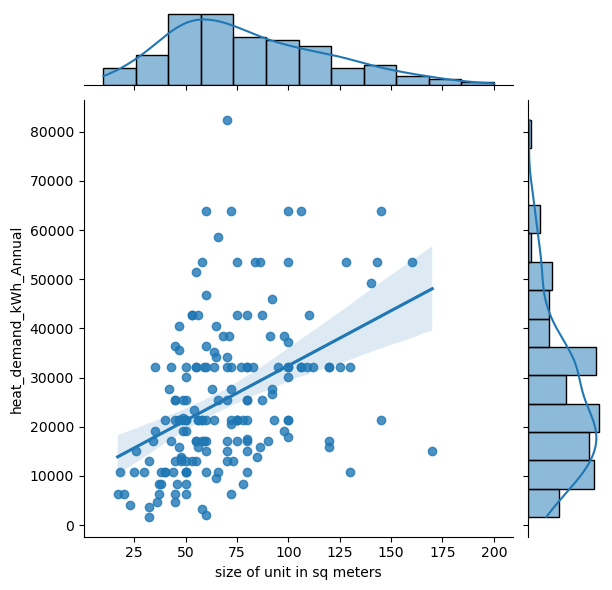

                              OLS Regression Results                              
Dep. Variable:     heat_demand_kWh_Annual   R-squared:                       0.181
Model:                                OLS   Adj. R-squared:                  0.176
Method:                     Least Squares   F-statistic:                     38.63
Date:                    Wed, 31 Jan 2024   Prob (F-statistic):           3.64e-09
Time:                            20:55:54   Log-Likelihood:                -1935.2
No. Observations:                     177   AIC:                             3874.
Df Residuals:                         175   BIC:                             3881.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [563]:


soep_1991 = data[(data.syear == 1991)]
sns.jointplot(x="size of unit in sq meters", y="heat_demand_kWh_Annual", data=soep_1991, kind="reg"); 
plt.show()
x = soep_1991['size of unit in sq meters'] 
y = soep_1991['heat_demand_kWh_Annual']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing = 'drop').fit()
predicitons = model.predict(x)

print_model = model.summary()
print(print_model)

/Users/ravi/opt/anaconda3/envs/lab/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


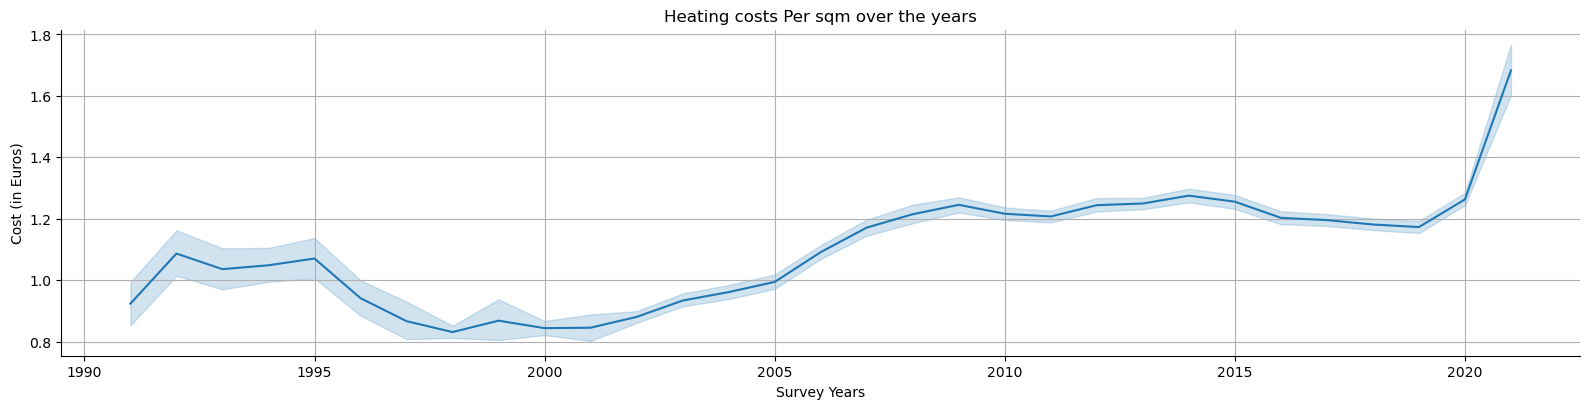

In [593]:
#plt.figure(figsize=(15,3))
chart = sns.relplot(data=dfinal, x="syear", y="Heating costs Per sqm", kind="line",height=4, aspect=4)
chart.set(xlabel='Survey Years', ylabel='Cost (in Euros)',title='Heating costs Per sqm over the years')
plt.grid()
plt.show()

This sudden incrase in costs to heat 1 sqm shows that the prices are very high compared to older  times. \
This could be due to price hike in energy caused by Russian sanctions.

/Users/ravi/opt/anaconda3/envs/lab/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


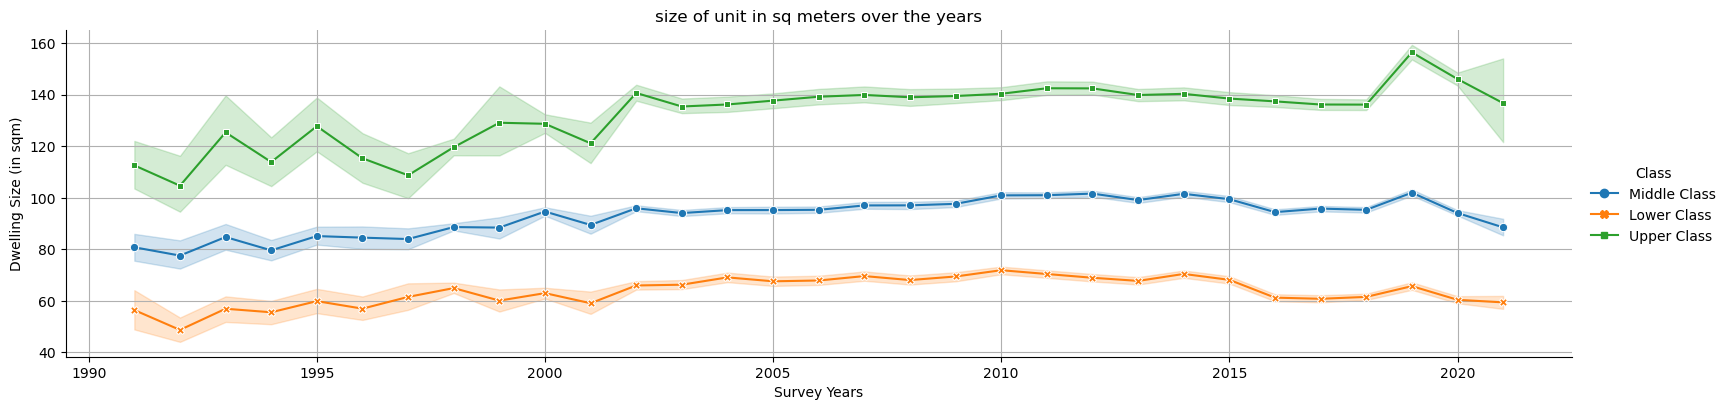

In [598]:
#plt.figure(figsize=(15,3))
chart = sns.relplot(data=dfinal, x="syear", y="size of unit in sq meters",hue='Class', kind="line",height=4, aspect=4,style="Class", markers=True, dashes=False)
chart.set(xlabel='Survey Years', ylabel='Dwelling Size (in sqm)',title='size of unit in sq meters over the years')
plt.grid()
plt.show()

/Users/ravi/opt/anaconda3/envs/lab/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


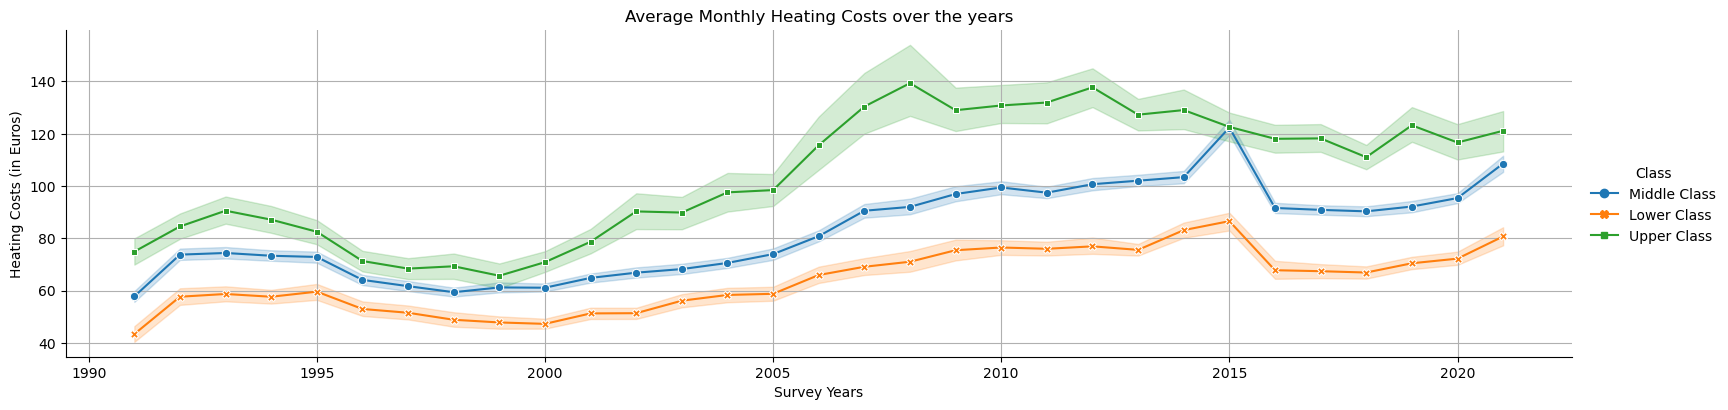

In [599]:
#plt.figure(figsize=(15,3))
chart = sns.relplot(data=dfinal, x="syear", y="Average Monthly Heating Costs",hue='Class', kind="line",height=4, aspect=4,style="Class", markers=True, dashes=False)
chart.set(xlabel='Survey Years', ylabel='Heating Costs (in Euros)',title='Average Monthly Heating Costs over the years')
plt.grid()
plt.show()

/Users/ravi/opt/anaconda3/envs/lab/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


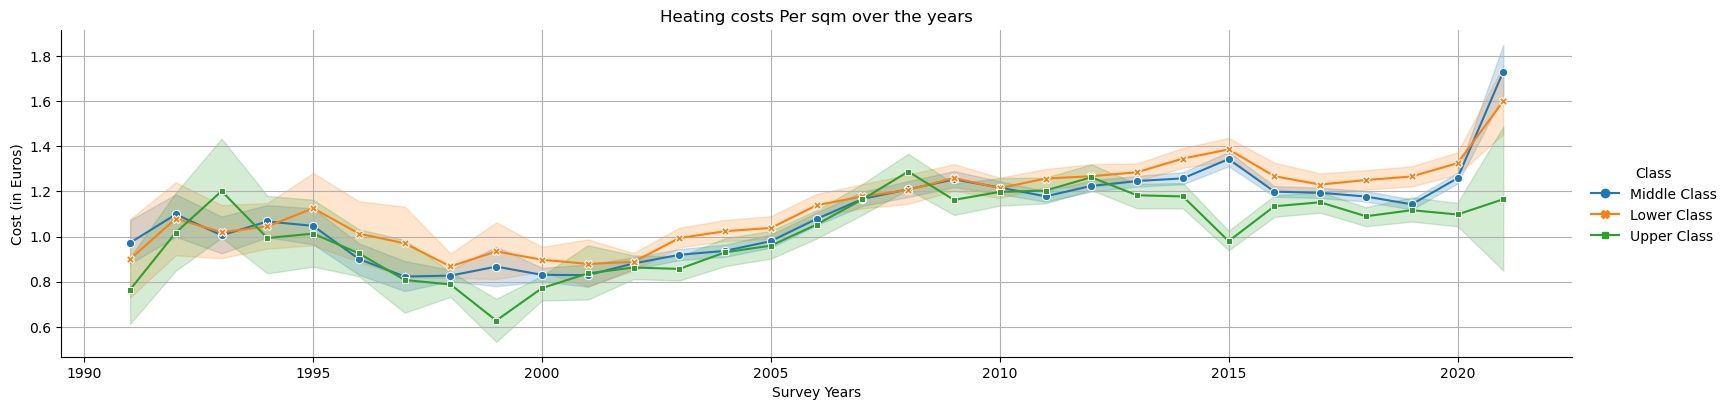

In [596]:
#plt.figure(figsize=(15,3))
chart = sns.relplot(data=dfinal, x="syear", y="Heating costs Per sqm",hue='Class', kind="line",height=4, aspect=4,style="Class", markers=True, dashes=False)
chart.set(xlabel='Survey Years', ylabel='Cost (in Euros)',title='Heating costs Per sqm over the years')
plt.grid()
plt.show()

Very interesting, the data suggests that upper class is spending the less money on heat per sqm and lower class is paying more money. \
Even though upper class is living in bigger houses and paying more for heating costs, the difference between heating costs of different class is not as big as difference between the dwelling size of these classes

/Users/ravi/opt/anaconda3/envs/lab/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


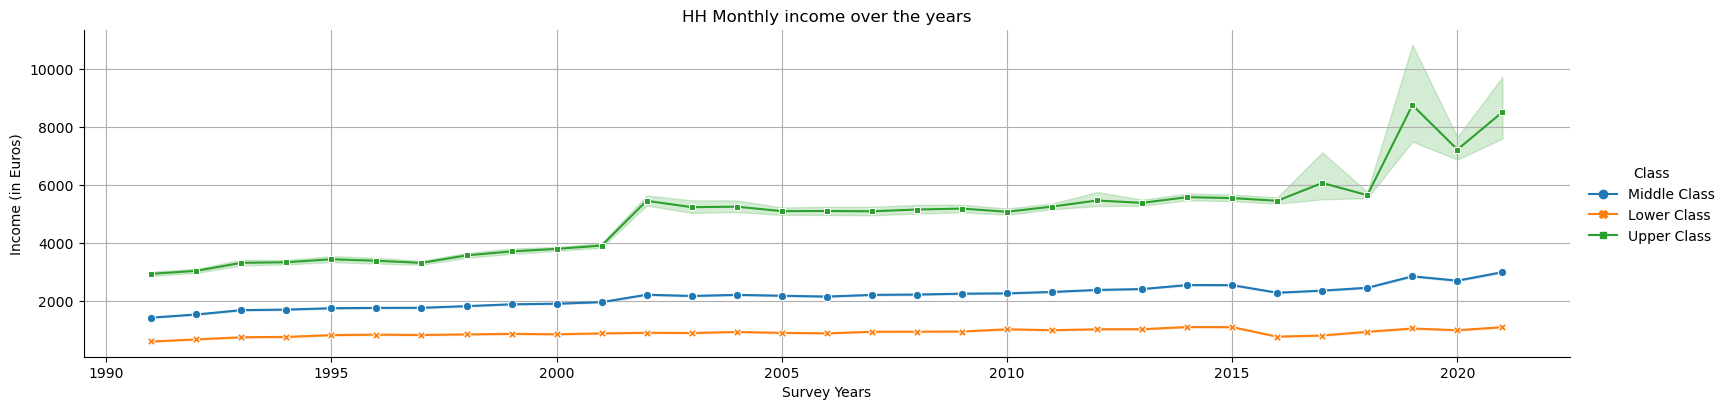

In [602]:
#plt.figure(figsize=(15,3))
chart = sns.relplot(data=dfinal, x="syear", y="HH Monthly income",hue='Class', kind="line",height=4, aspect=4,style="Class", markers=True, dashes=False)
chart.set(xlabel='Survey Years', ylabel='Income (in Euros)',title='HH Monthly income over the years')
plt.grid()
plt.show()

In [631]:
prod_cons_df = pd.read_csv('data/External/Production_consumption_in_TWh.csv')
prod_cons_df.head()

Year  Electricity supply by power plants  \
0  1,991                               459.9   
1  1,992                               462.0   
2  1,993                               454.0   
3  1,994                               457.2   
4  1,995                               463.4   

   Electricity supply by own industrial facilities  \
0                                             74.2   
1                                             70.0   
2                                             66.7   
3                                             65.1   
4                                             66.8   

   Electricity supply by other feeders  Total Domestic production  \
0                                  6.1                      540.2   
1                                  6.2                      538.2   
2                                  6.3                      527.0   
3                                  6.2                      528.5   
4                                  6.6                      536.8   

   Electricity produced from Water  Electricity produced from warmth  \
0                             19.5                             372.4   
1                             22.4                             355.8   
2                             23.6                             348.4   
3                             25.1                             350.0   
4                             27.0                             352.8   

   Electricity produced from Nuclear energy  \
0                                     147.4   
1                                     158.8   
2                                     153.5   
3                                     151.2   
4                                     154.1   

   Electricity produced from Renewables (wind, biomass, PV)  \
0                                                1.0          
1                                                1.2          
2                                                1.6          
3                                                2.2          
4                                                2.9          

   Electricity imported  ...  Gas Import from Netherlands  \
0                  30.4  ...                        219.5   
1                  28.4  ...                        232.0   
2                  33.6  ...                        245.6   
3                  35.9  ...                        220.6   
4                  39.7  ...                        233.8   

   Gas Import from Norway  Gas Import from Russia  Gas Import from Other  \
0                    94.8                   250.0                    9.4   
1                   107.7                   233.1                   15.4   
2                   109.3                   262.9                   12.0   
3                   118.1                   304.5                   17.3   
4                   130.5                   335.1                   16.2   

   Total Gas Production  Total Gas Consumption  \
0                 746.4                  469.2   
1                 761.3                  479.3   
2                 803.0                  514.5   
3                 844.7                  523.3   
4                 904.5                  562.8   

   Gas Consumption by Industrial Units  \
0                                197.2   
1                                201.0   
2                                200.4   
3                                204.2   
4                                207.8   

   Gas Consumption by Business, Commerce, Services  \
0                                             84.9   
1                                             85.3   
2                                             91.4   
3                                            101.7   
4                                            110.5   

   Gas Consumption by private households  Traffic  
0                                  187.1      NaN  
1                                  192.9      NaN  
2                    

In [632]:
prod_cons_df.columns

Index(['Year', 'Electricity supply by power plants',
       'Electricity supply by own industrial facilities',
       'Electricity supply by other feeders', 'Total Domestic production',
       'Electricity produced from Water', 'Electricity produced from warmth',
       'Electricity produced from Nuclear energy',
       'Electricity produced from Renewables (wind, biomass, PV)',
       'Electricity imported', 'Total Electricity Production',
       'Electricity Consumption by Industrial facilities',
       'Electricity Consumption by Traffic',
       'Electricity Consumption by Public facilities',
       'Electricity Consumption by households',
       'Electricity Consumption by Trade and commerce',
       'Total Domestic Consumption',
       'Electricity Consumption During Power Generation', 'Electricity Export',
       'Total Electricity Consumption', 'Domestic Gas Extraction',
       'Total gas import', 'Gas Import from Netherlands',
       'Gas Import from Norway', 'Gas Import from 

In [634]:
Gas_PC_df = prod_cons_df[['Year','Domestic Gas Extraction',
'Total gas import', 'Gas Import from Netherlands','Gas Import from Norway', 'Gas Import from Russia', 'Gas Import from Other', 'Total Gas Production',
       'Total Gas Consumption']]
Gas_PC_df

Year  Domestic Gas Extraction  Total gas import  \
0   1,991                    172.7             573.7   
1   1,992                    173.1             588.2   
2   1,993                    173.2             629.8   
3   1,994                    184.1             660.5   
4   1,995                    189.0             715.6   
5   1,996                    205.1             812.5   
6   1,997                    201.5             791.8   
7   1,998                    194.5             767.3   
8   1,999                    207.7             796.5   
9   2,000                    196.4             790.0   
10  2,001                    198.3             820.5   
11  2,002                    197.8             851.7   
12  2,003                    205.9             886.1   
13  2,004                    190.5             942.4   
14  2,005                    184.0             951.0   
15  2,006                    181.7             978.3   
16  2,007                    166.5             924.0   
17  2,008                    151.6             967.6   
18  2,009                    141.8             987.3   
19  2,010                    123.7            1037.2   
20  2,011                    116.4             993.2   
21  2,012                    105.2            1027.6   
22  2,013                     95.7            1041.1   
23  2,014                     89.9            1002.1   
24  2,015                     83.3            1191.2   
25  2,016                     76.9            1155.5   
26  2,017                     70.9            1127.0   
27  2,018                     60.8            1234.4   

    Gas Import from Netherlands  Gas Import from Norway  \
0                         219.5                    94.8   
1                         232.0                   107.7   
2                         245.6                   109.3   
3                         220.6                   118.1   
4                         233.8                   130.5   
5                         277.1                   175.8   
6                         231.3                   209.9   
7                         207.5                   193.3   
8                         195.9                   200.2   
9                         174.7                   210.7   
10                        195.4                   231.1   
11                        189.9                   268.2   
12                        179.1                   274.6   
13                        208.2                   288.6   
14                        204.4                   305.2   
15                        229.3                   297.2   
16                        205.1                   289.4   
17                        184.9                   316.1   
18                        201.9                   361.1   
19                        223.3                   363.4   
20                        219.3                   342.1   
21                        229.7                   357.9   
22                        272.1                   305.7   
23                        241.2                   332.0   
24                        343.6                   405.7   
25                          NaN                     NaN   
26                          NaN                     NaN   
27                          NaN                     NaN   

    Gas Import from Russia  Gas Import from Other  Total Gas Production  \
0                    250.0                    9.4                 746.4   
1                    233.1                   15.4                 761.3   
2                    262.9                   12.0                 803.0   
3                    304.5                   17.3                 844.7   
4                    335.1                   16.2                 904.5   
5                    338.9                   20.8                1017.6   
6                    320.1                   30.6                 993.3   
7                    340.6                   25.9                 96

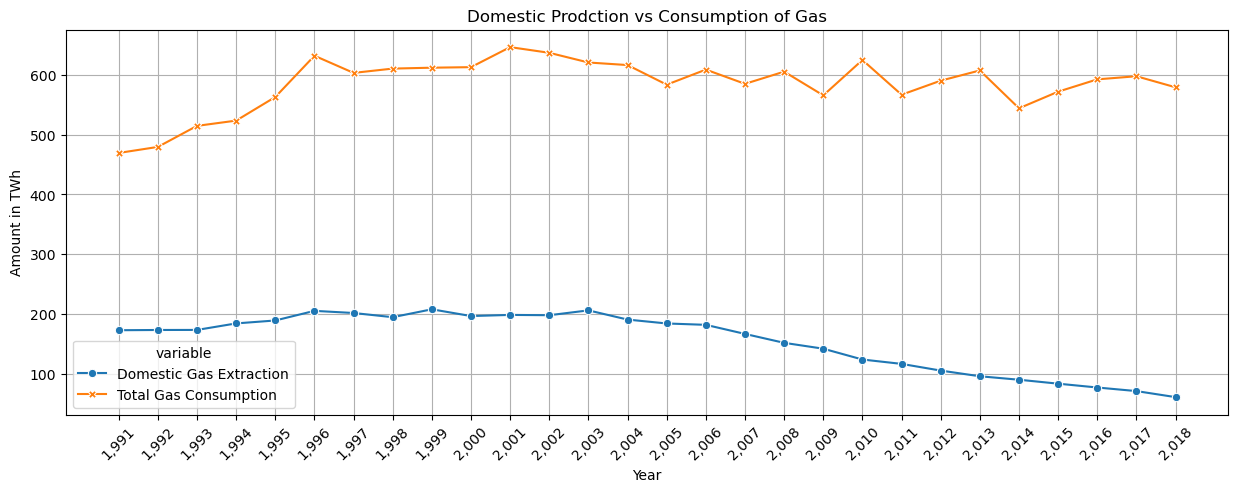

In [638]:


plt.figure(figsize=(15,5))
data = Gas_PC_df[['Year','Domestic Gas Extraction','Total Gas Consumption']].copy()
chart = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data, ['Year']), style="variable", markers=True, dashes=False)
chart.tick_params(axis='x',rotation=45)   
chart.set(xlabel='Year', ylabel='Amount in TWh',title='Domestic Prodction vs Consumption of Gas') 
plt.grid() 
plt.show()

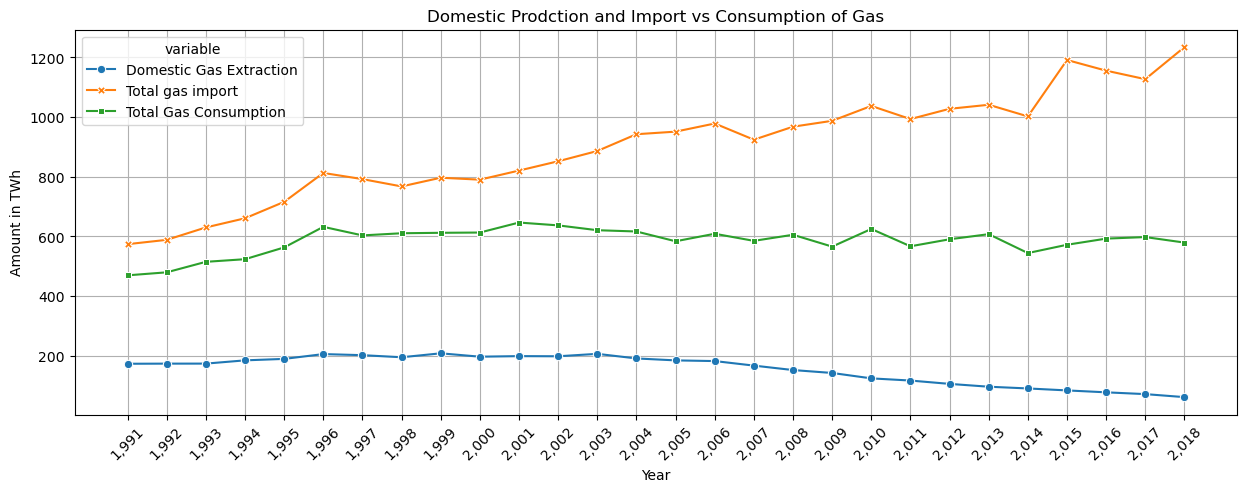

In [639]:
plt.figure(figsize=(15,5))
data = Gas_PC_df[['Year','Domestic Gas Extraction','Total gas import','Total Gas Consumption']].copy()
chart = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data, ['Year']), style="variable", markers=True, dashes=False)
chart.tick_params(axis='x',rotation=45)   
chart.set(xlabel='Year', ylabel='Amount in TWh',title='Domestic Prodction and Import vs Consumption of Gas') 
plt.grid() 
plt.show()

<Axes: title={'center': 'Gas Imports'}, xlabel='Year', ylabel='Import Amount in KWh'>

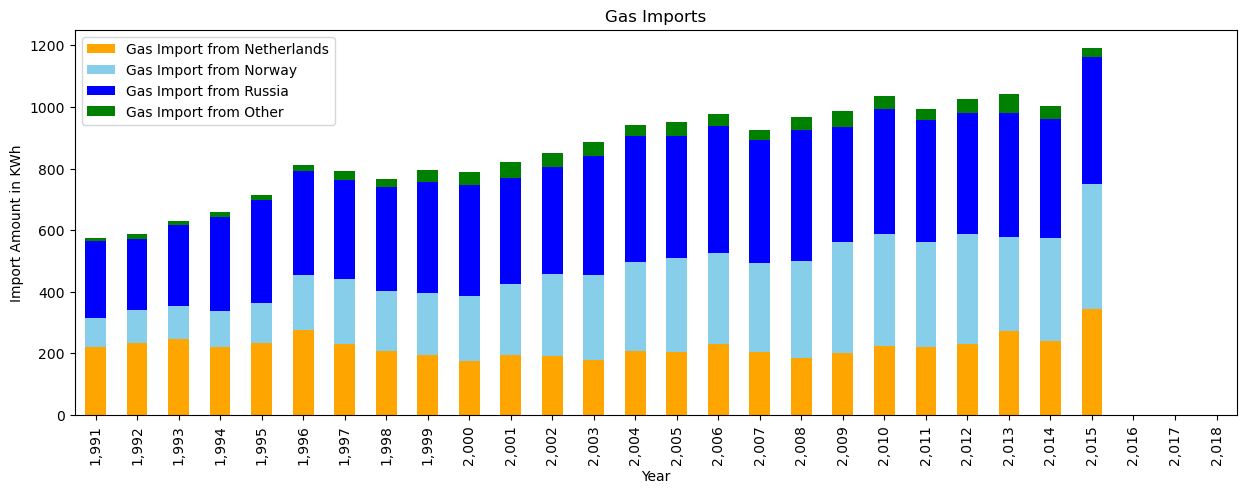

In [652]:
gas_import_df = prod_cons_df[['Year', 'Gas Import from Netherlands','Gas Import from Norway', 'Gas Import from Russia','Gas Import from Other']].copy()
gas_import_df = gas_import_df.set_index('Year')
gas_import_df
gas_import_df.plot(kind='bar', stacked=True, color=['Orange', 'skyblue', 'Blue','green'],figsize=(15,5),ylabel='Import Amount in KWh',title='Gas Imports')


Ignore below ones


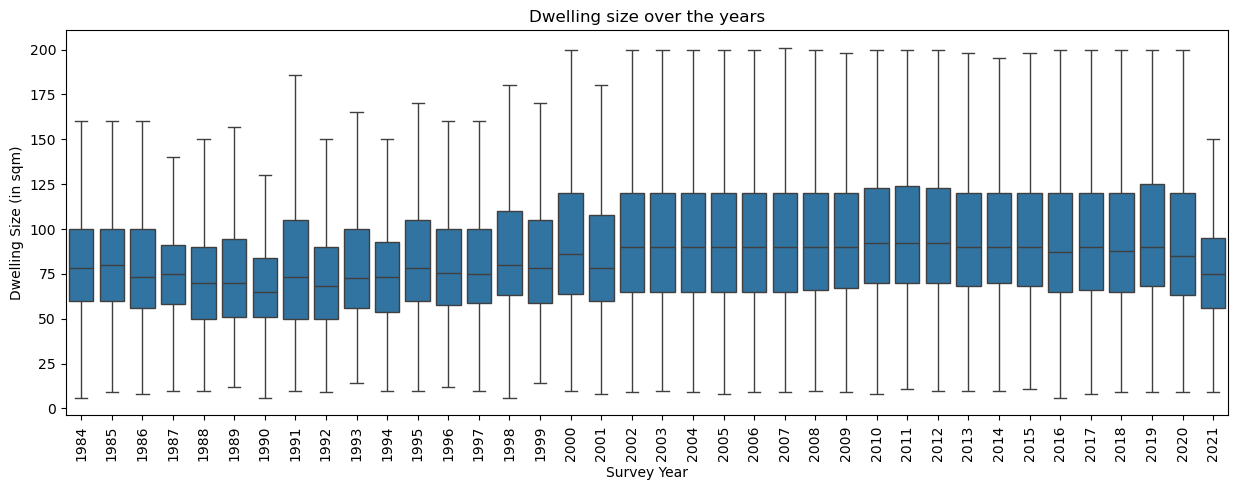

In [ ]:
#dfinal['size of unit in sq meters'].isna().value_counts()
Q1 = hl_df['size of unit in sq meters'].quantile(0.25)
Q3 = hl_df['size of unit in sq meters'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (hl_df['size of unit in sq meters'] >= Q1 - 1.5 * IQR) & (hl_df['size of unit in sq meters'] <= Q3 + 1.5 *IQR)
plt.figure(figsize=(15,5))
chart = sns.boxplot(
            data = hl_df.loc[filter],
            #data = hl_df,
            #data = non_zero_th_apt_2000s,
            x = 'syear',
            y = 'size of unit in sq meters',
            #hue = 'cancellation policy',
            showmeans=False,
            showfliers=False,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"}
           )
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Dwelling Size (in sqm)',title='Dwelling size over the years')  
plt.show()


In [ ]:
hh_energy_prices_df = pd.read_csv('data/External/HH_energy_prices_over_the_years.csv')
display(hh_energy_prices_df.shape)
hh_energy_prices_df.head()

(28, 9)

Year  Cost of Light heating oil (euros/100L)  \
0  1991                                   26.38   
1  1992                                   24.34   
2  1993                                   24.77   
3  1994                                   23.08   
4  1995                                   21.94   

   Cost of Light heating oil (cents/KWh)  Cost of Natural gas (cents/KWh)  \
0                                   2.54                             3.55   
1                                   2.34                             3.58   
2                                   2.38                             3.55   
3                                   2.22                             3.55   
4                                   2.11                             3.48   

   Cost of Electricity (cents/KWh)  \
0                            14.80   
1                            15.51   
2                            15.89   
3                            16.20   
4                            16.36   

   Cost of briquettes and pellets (euros/100 kg)  \
0                                          22.39   
1                                          23.52   
2                                          24.90   
3                                          25.72   
4                                          26.24   

   Cost of briquettes and pellets (cents/KWh)  \
0                                        4.00   
1                                        4.20   
2                                        4.45   
3                                        4.59   
4                                        4.69   

   Cost of District heating (euros/GJ)  Cost of District heating (cents/KWh)  
0                                11.86                                  4.27  
1                                11.89                                  4.28  
2                                12.29                                  4.42  
3                                12.30                                  4.42  
4                                12.34                                  4.44

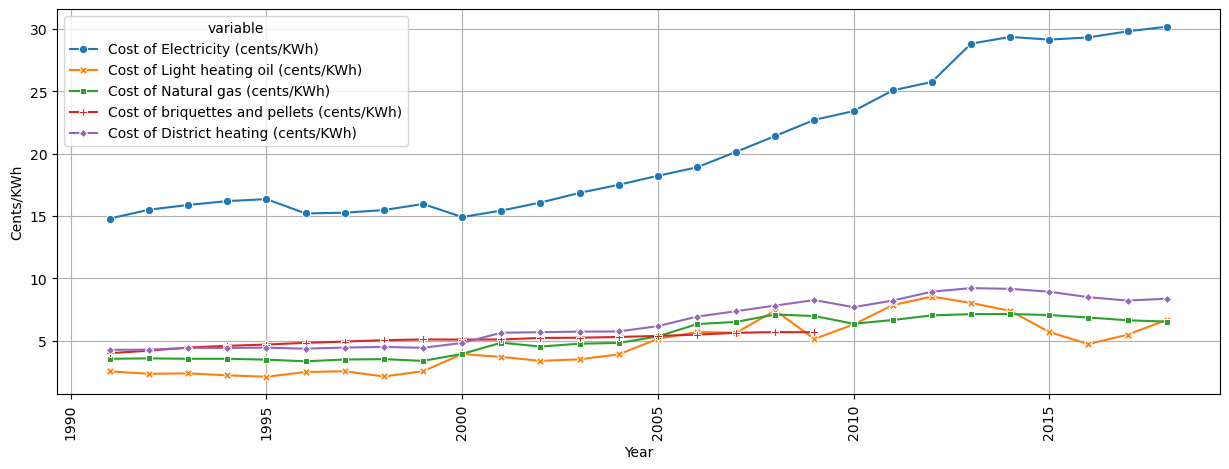

In [ ]:
plt.figure(figsize=(15,5))
data = hh_energy_prices_df[['Year',
'Cost of Electricity (cents/KWh)',
'Cost of Light heating oil (cents/KWh)',
'Cost of Natural gas (cents/KWh)',
'Cost of briquettes and pellets (cents/KWh)',
'Cost of District heating (cents/KWh)'
]].copy()
chart = sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(data, ['Year']), style="variable", markers=True, dashes=False)
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Year', ylabel='Cents/KWh') 
plt.grid() 
plt.show()

In [ ]:
loc_1_ppl_HH = (hl_df['Number of persons in dwelling unit'] == 1)
loc_2_ppl_HH = (hl_df['Number of persons in dwelling unit'] == 2)
loc_3_plus_ppl_HH = (hl_df['Number of persons in dwelling unit'] >= 3)

hl_df['Number of person in HH'] = np.nan
hl_df.loc[loc_1_ppl_HH,'Number of person in HH'] = 1
hl_df.loc[loc_2_ppl_HH,'Number of person in HH'] = 2
hl_df.loc[loc_3_plus_ppl_HH,'Number of person in HH'] = '3 or More'
hl_df[loc_1_ppl_HH | loc_2_ppl_HH | loc_3_plus_ppl_HH][['syear','Average Monthly Heating Costs','Number of person in HH']]

Number of person in HH
3 or More    1030
2.0           420
1.0           289
Name: count, dtype: int64

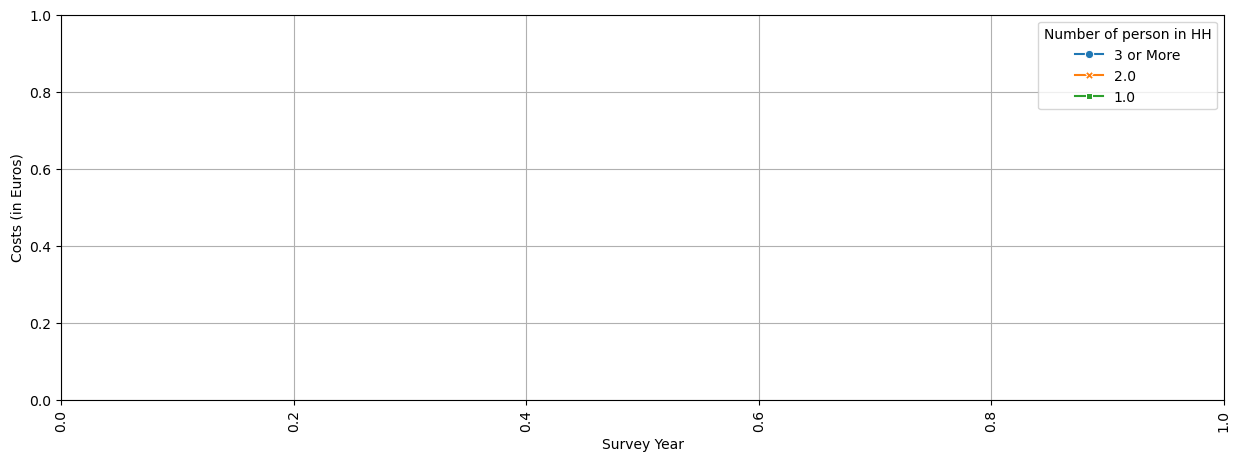

In [ ]:
plt.figure(figsize=(15,5))
data = hl_df[loc_1_ppl_HH | loc_2_ppl_HH | loc_3_plus_ppl_HH][['syear','Average Monthly Heating Costs','Number of person in HH']].copy()
chart = sns.lineplot(x='syear', y='Average Monthly Heating Costs', hue='Number of person in HH', data=data, style='Number of person in HH', markers=True, dashes=False)
chart.tick_params(axis='x', rotation=90)   
chart.set(xlabel='Survey Year', ylabel='Costs (in Euros)') 
plt.grid() 
plt.show()